# Comparison with APOGEE (allStar-t9-l31c-58158.fits)

In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import sys
import collections
import glob
import pickle
import pandas
from astropy.stats import sigma_clipped_stats

# Packages to work with FITS and (IDL) SME.out files
import astropy.io.fits as pyfits
import astropy.table as table
from astropy.table import Table
from scipy.io.idl import readsav

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [2]:
galah = Table.read('../../../catalogs/GALAH_DR3_main_allspec_v2.fits')
galah['TMASS_ID'] = galah['star_id']
apogee_dr16 = Table.read('../../../../Surveys/APOGEE_DR16.fits')

In [3]:
galah_apogee = table.join(galah, apogee_dr16, keys='TMASS_ID')

In [4]:
def plot_kiel_comparison(
    data, ax1, ax2, 
    label = 'GALAH', isochrones = False, cmin = 2, teff = (2750, 8250, 50), logg = (-0.5, 5.5, 0.05), feh = (-2, 0.5)):
    
    marcs_kwargs = dict(
        c = 'r',
        lw = 1
    )

    ax1.text(0.05,0.95,label,transform=ax1.transAxes, color='k', fontsize=15, ha='left')
    ax1.text(0.05,0.9,str(len(data['teff']))+' Spectra',transform=ax1.transAxes, color='k', fontsize=15, ha='left')
    ax1.text(0.05,0.85,r'Median S/N = '+str(np.round(np.median(data['SNR']))),transform=ax1.transAxes, color='k', fontsize=15, ha='left')
    ax2.text(0.05,0.85,r'Median S/N = '+str(np.round(np.median(data['snr_c2_iraf']))),transform=ax2.transAxes, color='k', fontsize=15, ha='left')

    hist_scatter = dict(
        s = 1,
        c = 'k',
        zorder = 1,
        rasterized = True
    )

    ax1.scatter(
        data['TEFF'],
        data['LOGG'],
        **hist_scatter
    )

    hist_kwargs_density = dict(
        cmap = parula,
        cmin = cmin,
        bins = (
            np.arange(teff[0],teff[1] + teff[2], teff[2]),
            np.arange(logg[0],logg[1] + logg[2], logg[2])
        ),
        vmin=cmin, #vmax=3*10**3,
        rasterized = True,
        norm=LogNorm()
    )

    p1, x1, y1, s1 = ax1.hist2d(
        data['TEFF'],
        data['LOGG'],
        zorder=2,
        **hist_kwargs_density
    )

    ax1.set_xlim(teff[1],teff[0])
    ax1.set_xlabel(r'$T_\text{eff}$ APOGEE DR16')
    ax1.set_ylim(logg[1],logg[0])
    ax1.set_ylabel(r'$\log g$ APOGEE DR16')
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Stars')
    

    ax2.text(0.05,0.95,'GALAH DR3',transform=ax2.transAxes, color='k', fontsize=15, ha='left')

    hist_scatter = dict(
        s = 1,
        c = 'k',
        zorder = 1,
        rasterized = True
    )

    ax2.scatter(
        data['teff'],
        data['logg'],
        **hist_scatter
    )

    hist_kwargs_density = dict(
        cmap = parula,
        cmin = cmin,
        bins = (
            np.arange(teff[0],teff[1] + teff[2], teff[2]),
            np.arange(logg[0],logg[1] + logg[2], logg[2])
        ),
        vmin=cmin, #vmax=3*10**3,
        rasterized = True,
        norm=LogNorm()
    )

    p2, x2, y2, s2 = ax2.hist2d(
        data['teff'],
        data['logg'],
        zorder=2,
        **hist_kwargs_density
    )

    ax2.set_xlim(teff[1],teff[0])
    ax2.set_xlabel(r'$T_\text{eff}$ GALAH DR3')
    ax2.set_ylim(logg[1],logg[0])
    ax2.set_ylabel(r'$\log g$ GALAH DR3')
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label('Nr. Stars')

    plt.tight_layout()

In [5]:
def plot_delta(
    data, galah_param, comparison_param, ax,
    xlabel = 'galah', ylabel= 'galah-other', we_them = 'galah_other', cmin=5, bins=50
    ):
    
    if we_them == 'galah_other':
        x_data = data[galah_param]
        y_data = data[comparison_param] - data[galah_param]
    else:
        x_data = data[comparison_param]
        y_data = data[galah_param] - data[comparison_param]
        
    ax.scatter(
        x_data,
        y_data,
        zorder=1,
        s=2,
        color=_parula_data[0]
        )
    
    p,x,y,s1 = ax.hist2d(
        x_data,
        y_data,
        cmin=cmin,
        bins=bins,
        cmap=parula,
        zorder=2
        )
    
    kwargs_text = dict(transform=ax.transAxes, fontsize=15,ha='left',bbox=dict(boxstyle='square,pad=0', facecolor='white', ec='white', alpha=0.85))
    
    mean, median, stddev = sigma_clipped_stats(y_data)
    in_3_sigma = np.abs(y_data) <= 3*stddev

    giant_dwarf_cut = (data['teff'] < 5500) | (data['logg'] < 3.5)

    mean_g, median_g, stddev_g = sigma_clipped_stats(y_data[giant_dwarf_cut])
    in_3_sigma_g = np.abs(y_data) <= 3*stddev_g

    mean_d, median_d, stddev_d = sigma_clipped_stats(y_data[~giant_dwarf_cut])
    in_3_sigma_d = np.abs(y_data) <= 3*stddev_d


    if galah_param == 'teff':
        ax.set_title(ylabel+r': Mean$\pm$Sigma '+"{:.0f}".format(mean)+'$\pm$'+"{:.0f}".format(stddev), fontsize=20)
        ax.text(0.015,0.2,r'Giants: '+"{:.0f}".format(mean_g)+'$\pm$'+"{:.0f}".format(stddev_g),**kwargs_text)
        ax.text(0.015,0.05,r'Dwarfs: '+"{:.0f}".format(mean_d)+'$\pm$'+"{:.0f}".format(stddev_d),**kwargs_text)
#         ax.set_title(ylabel+r': Mean$\pm$Sigma, Median, RMS: '+"{:.0f}".format(mean)+'$\pm$'+"{:.0f}".format(stddev)+', '+"{:.0f}".format(median)+', '+"{:.0f}".format(np.sqrt(np.mean(np.square(y_data[in_3_sigma])))), fontsize=20)
#         ax.text(0.015,0.2,r'Giants: '+"{:.0f}".format(mean_g)+'$\pm$'+"{:.0f}".format(stddev_g)+', '+"{:.0f}".format(median_g)+', '+"{:.0f}".format(np.sqrt(np.mean(np.square(y_data[in_3_sigma_g])))),**kwargs_text)
#         ax.text(0.015,0.05,r'Dwarfs: '+"{:.0f}".format(mean_d)+'$\pm$'+"{:.0f}".format(stddev_d)+', '+"{:.0f}".format(median_d)+', '+"{:.0f}".format(np.sqrt(np.mean(np.square(y_data[in_3_sigma_d])))),**kwargs_text)
    else:
        ax.set_title(ylabel+r': Mean$\pm$Sigma: '+"{:.2f}".format(mean)+'$\pm$'+"{:.2f}".format(stddev), fontsize=20)
        ax.text(0.015,0.2,r'Giants: '+"{:.2f}".format(mean_g)+'$\pm$'+"{:.2f}".format(stddev_g),**kwargs_text)
        ax.text(0.015,0.05,r'Dwarfs: '+"{:.2f}".format(mean_d)+'$\pm$'+"{:.2f}".format(stddev_d),**kwargs_text)
#         ax.set_title(ylabel+r': Mean$\pm$Sigma, Median, RMS: '+"{:.2f}".format(mean)+'$\pm$'+"{:.2f}".format(stddev)+', '+"{:.2f}".format(median)+', '+"{:.2f}".format(np.sqrt(np.mean(np.square(y_data[in_3_sigma])))), fontsize=20)
#         ax.text(0.015,0.2,r'Giants: '+"{:.2f}".format(mean_g)+'$\pm$'+"{:.2f}".format(stddev_g)+', '+"{:.2f}".format(median_g)+', '+"{:.2f}".format(np.sqrt(np.mean(np.square(y_data[in_3_sigma_g])))),**kwargs_text)
#         ax.text(0.015,0.05,r'Dwarfs: '+"{:.2f}".format(mean_d)+'$\pm$'+"{:.2f}".format(stddev_d)+', '+"{:.2f}".format(median_d)+', '+"{:.2f}".format(np.sqrt(np.mean(np.square(y_data[in_3_sigma_d])))),**kwargs_text)
    
    c = plt.colorbar(s1, ax=ax)
    c.set_label('Nr. Spectra')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.axhline(0,c='r',zorder=3)
    ax.axhline(0,c='w',ls='dashed',zorder=3)

In [6]:
def plot_abundances(data, galah_param, comparison_param, 
                    label_galah, label_other, label_element,
                    xlabel = 'galah', ylabel = 'galah-other', we_them = 'galah_other', cmin=5, bins=50):
    
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(11.69,8.27))
    
    kwargs_hist2d = dict(cmin=cmin, cmap=parula, bins=bins)
        
    p,x,y,s=ax1.hist2d(
        data['fe_h'],
        data[galah_param],
        **kwargs_hist2d
        )

    c = plt.colorbar(s,ax=ax1)
    c.set_label('Nr. Spectra')
    p,x,y,s=ax2.hist2d(
        data['FE_H'],
        data[comparison_param],
        **kwargs_hist2d
        )
    c = plt.colorbar(s,ax=ax2)
    c.set_label('Nr. Spectra')
   
    ax1.set_xlabel('[Fe/H] '+label_galah)
    ax2.set_xlabel('[Fe/H] '+label_other)
    ax1.set_ylabel('['+label_element+'/Fe] '+label_galah)
    ax2.set_ylabel('['+label_element+'/Fe] APOGEE')

    bins_x = np.linspace(
        -3*np.std(data[comparison_param]-data[galah_param]),
        3*np.std(data[comparison_param]-data[galah_param]),
        100
    )
    bins_y = np.linspace(
        np.mean(data[galah_param])-3*np.std(data[galah_param]),
        np.mean(data[galah_param])+3*np.std(data[galah_param]),
        100
    )
    
    ax2.text(0.035,0.925,label_other,transform=ax2.transAxes, color='k', fontsize=15, ha='left')
    ax2.text(0.035,0.85,str(len(data['teff']))+' Spectra',transform=ax2.transAxes, color='k', fontsize=15, ha='left')

    ax1.text(0.05,0.8,r'Median S/N = '+str(np.round(np.median(data['snr_c2_iraf']))),transform=ax1.transAxes, color='k', fontsize=15, ha='left')
    ax2.text(0.05,0.8,r'Median S/N = '+str(np.round(np.median(data['SNR']))),transform=ax2.transAxes, color='k', fontsize=15, ha='left')

    kwargs_hist2d_delta = dict(
        cmin=cmin,
        bins = (bins_x,bins_y),
        cmap=parula
        )

    p,x,y,s=p,x,y,s=ax3.hist2d(
        data[galah_param]-data[comparison_param],
        data[comparison_param],
        **kwargs_hist2d_delta
        )

    c = plt.colorbar(s,ax=ax3)
    c.set_label('Nr. Spectra')
    #ax3.set_xlabel('APOGEE - GALAH')
    #ax3.set_ylabel('['+label_element+'/Fe] '+label_galah)
    ax3.set_xlabel('GALAH-APOGEE')
    ax3.set_ylabel('['+label_element+'/Fe] APOGEE')

    ax4.hist(
        data[galah_param]-data[comparison_param],
        bins=bins_x
    )
    
    kwargs_axlines = dict(c='r',lw=0.5,ls='dashed')
    s
    ax1.axvline(0,**kwargs_axlines)
    ax1.axhline(0,**kwargs_axlines)
    ax2.axvline(0,**kwargs_axlines)
    ax2.axhline(0,**kwargs_axlines)
    ax3.axvline(0,**kwargs_axlines)
    ax3.axhline(0,**kwargs_axlines)
    ax4.axvline(0,**kwargs_axlines)
    
    kwargs_text = dict(transform=ax4.transAxes, fontsize=15,ha='center')
        
    mean, median, stddev = sigma_clipped_stats(data[galah_param]-data[comparison_param])
        
    in_3_sigma = np.abs(data[galah_param]-data[comparison_param]) <= 3*stddev
        
    ax4.set_xlabel('GALAH-APOGEE')
    ax4.set_ylabel('Nr. Spectra')
    
    ax4.text(0.15,0.9,'Mean',**kwargs_text)
    ax4.text(0.3,0.9,'Sigma',**kwargs_text)
    #ax4.text(0.65,0.9,'Median',**kwargs_text)
    #ax4.text(0.8,0.9,'RMS',**kwargs_text)

    ax4.text(0.15,0.8,"{:.3f}".format(mean),**kwargs_text)
    ax4.text(0.3,0.8,"{:.3f}".format(stddev),**kwargs_text)
    #ax4.text(0.65,0.8,"{:.3f}".format(median),**kwargs_text)
    #ax4.text(0.8,0.8,"{:.3f}".format(np.sqrt(np.mean(np.square(data[galah_param][in_3_sigma]-data[comparison_param][in_3_sigma])))),**kwargs_text)
    
    print(mean, stddev)

In [7]:
def plot_abundances_APOGEE(each_element, use_sp):
    
    if each_element == 'alpha':
        each_element_in_dict = each_element+'_fe'
        apogee_element = each_element.upper()+'_M'
    elif each_element in ['C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','V','Cr','Mn','Co','Ni','Cu','Zn','Rb','Sr','Zr','Mo','Ru','Y','Ba','La','Ce','Nd','Eu']:
        each_element_in_dict = each_element+'_fe'
        apogee_element = each_element.upper()+'_FE'
    elif each_element in ['Ti2']:
        each_element_in_dict = each_element+'_fe'
        apogee_element =  'TIII_FE'
    else:
        print('not found!')
        
    if apogee_element=='ALPHA_M':
        flag = 'FE_H_FLAG'
    elif apogee_element=='TIII_FE':
        flag = 'TIII_FE_FLAG'
    else:
        flag = apogee_element+'_FLAG'
        
    print(each_element_in_dict, apogee_element)
        
    use = (
        use_sp &
        np.isfinite(galah_apogee[each_element_in_dict]) &
        (galah_apogee['flag_'+each_element_in_dict] == 0) &
        (galah_apogee[apogee_element] > -10) &
        (galah_apogee[flag] == 0)
    )

    if each_element == 'alpha':
        label_element = r'$\alpha$'
    else:
        label_element = each_element
    label_apogee= 'APOGEE DR16beta (cal.)'
    label_galah = 'GALAH iDR3'
    
    plot_abundances(
        galah_apogee[use],
        galah_param = each_element_in_dict,
        comparison_param = apogee_element,
        label_galah = label_galah,
        label_other = label_apogee, 
        label_element = label_element,
        cmin = 1,
        bins = (
            np.linspace(-2.5,1.0,100),
            np.linspace(-0.75,1.0,100)
            )
        )

    plt.tight_layout()

/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


alpha_fe ALPHA_M


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.029528565669308525 0.053551117559182765
C_fe C_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.009335593121046891 0.131066512761354
O_fe O_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.1757746042076229 0.2066420169532161
Na_fe NA_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.08466604856731166 0.14247951300301237
Mg_fe MG_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.006858866788823811 0.09333947553038326
Al_fe AL_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.08068610505970018 0.14409932383806331
Si_fe SI_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.024826144351498523 0.09015038802958551
K_fe K_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


-0.009489626132770186 0.16499208145283678
Ca_fe CA_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.053073467494473676 0.09671773482977952
Ti_fe TI_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.038192542161379225 0.123072681573075
Ti2_fe TIII_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


-0.026709514417432238 0.24095977830462956
V_fe V_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.2316994100480358 0.343440696499864
Cr_fe CR_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.005245679810147088 0.1246059339372385
Mn_fe MN_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


-0.004771735891820305 0.08739563356858125
Co_fe CO_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.01744343932852219 0.16363001971524724
Ni_fe NI_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


-0.0028859104601982235 0.10069449517281977
Cu_fe CU_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.027408461378541138 0.209958088511246
Ce_fe CE_FE


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


-0.06423395843808913 0.23397500413782893


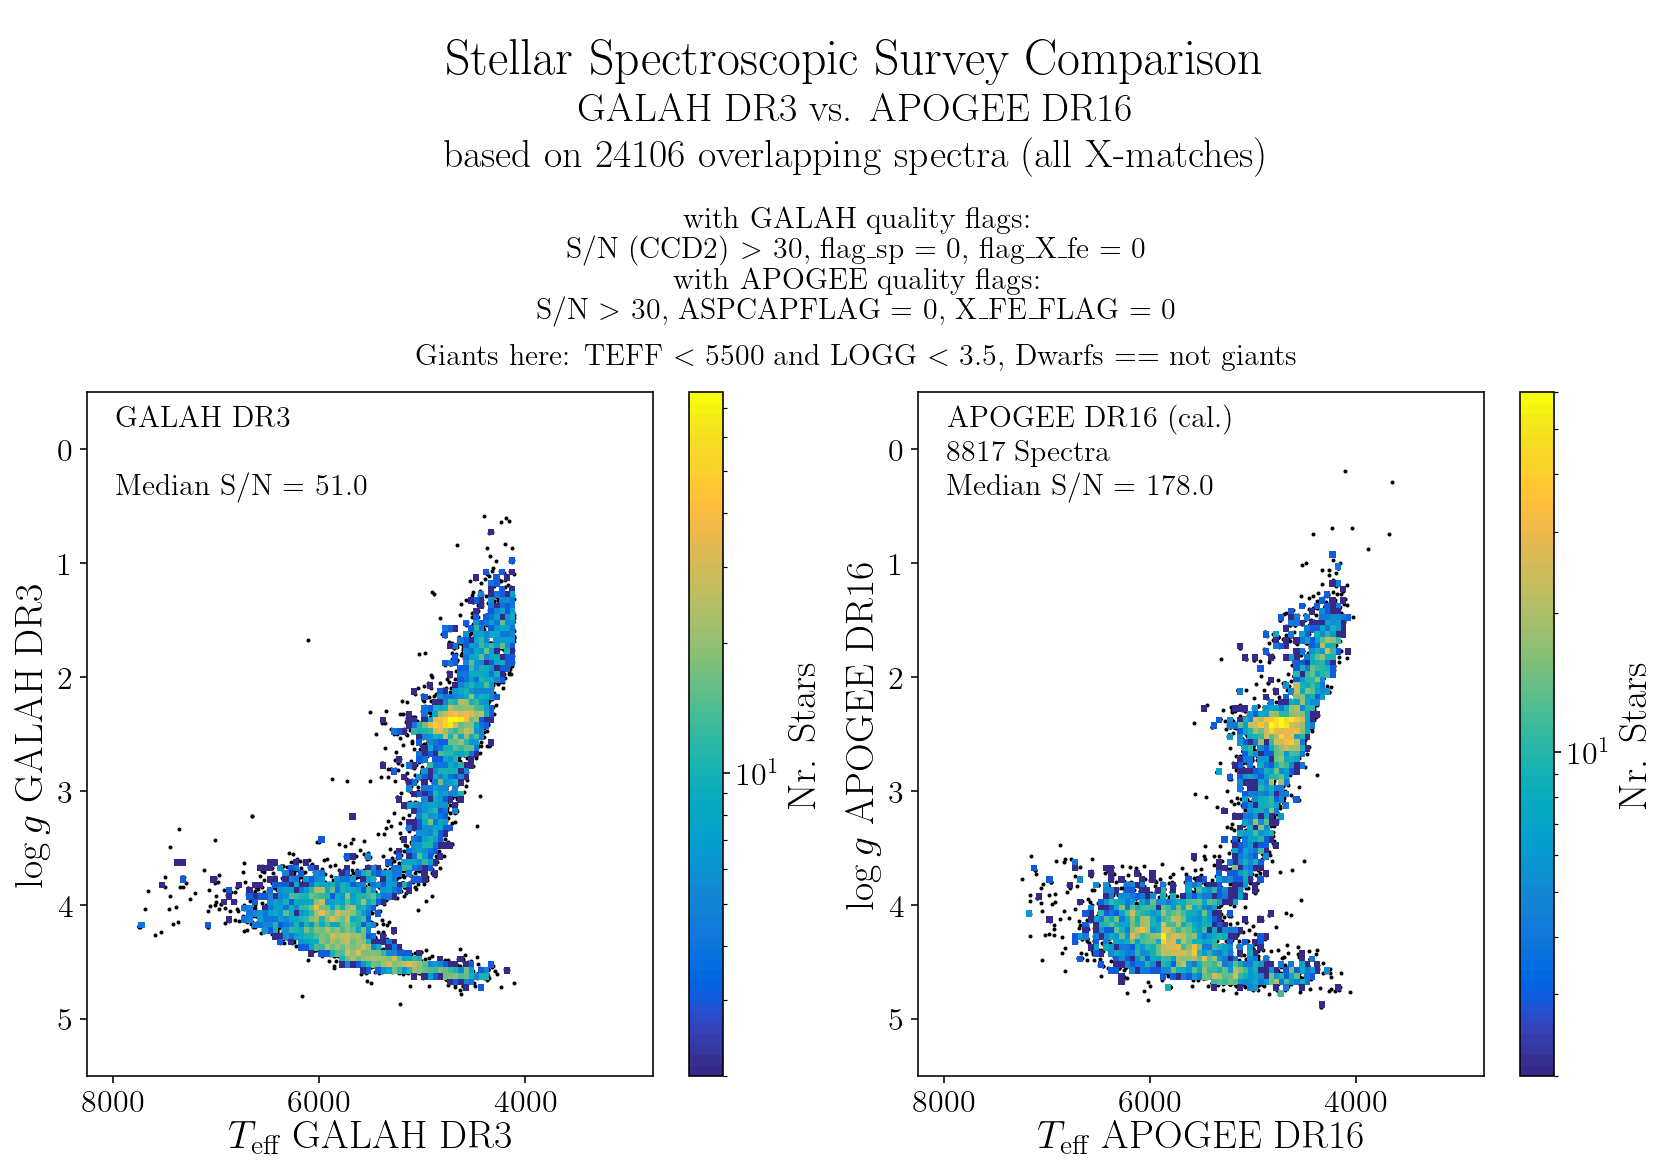

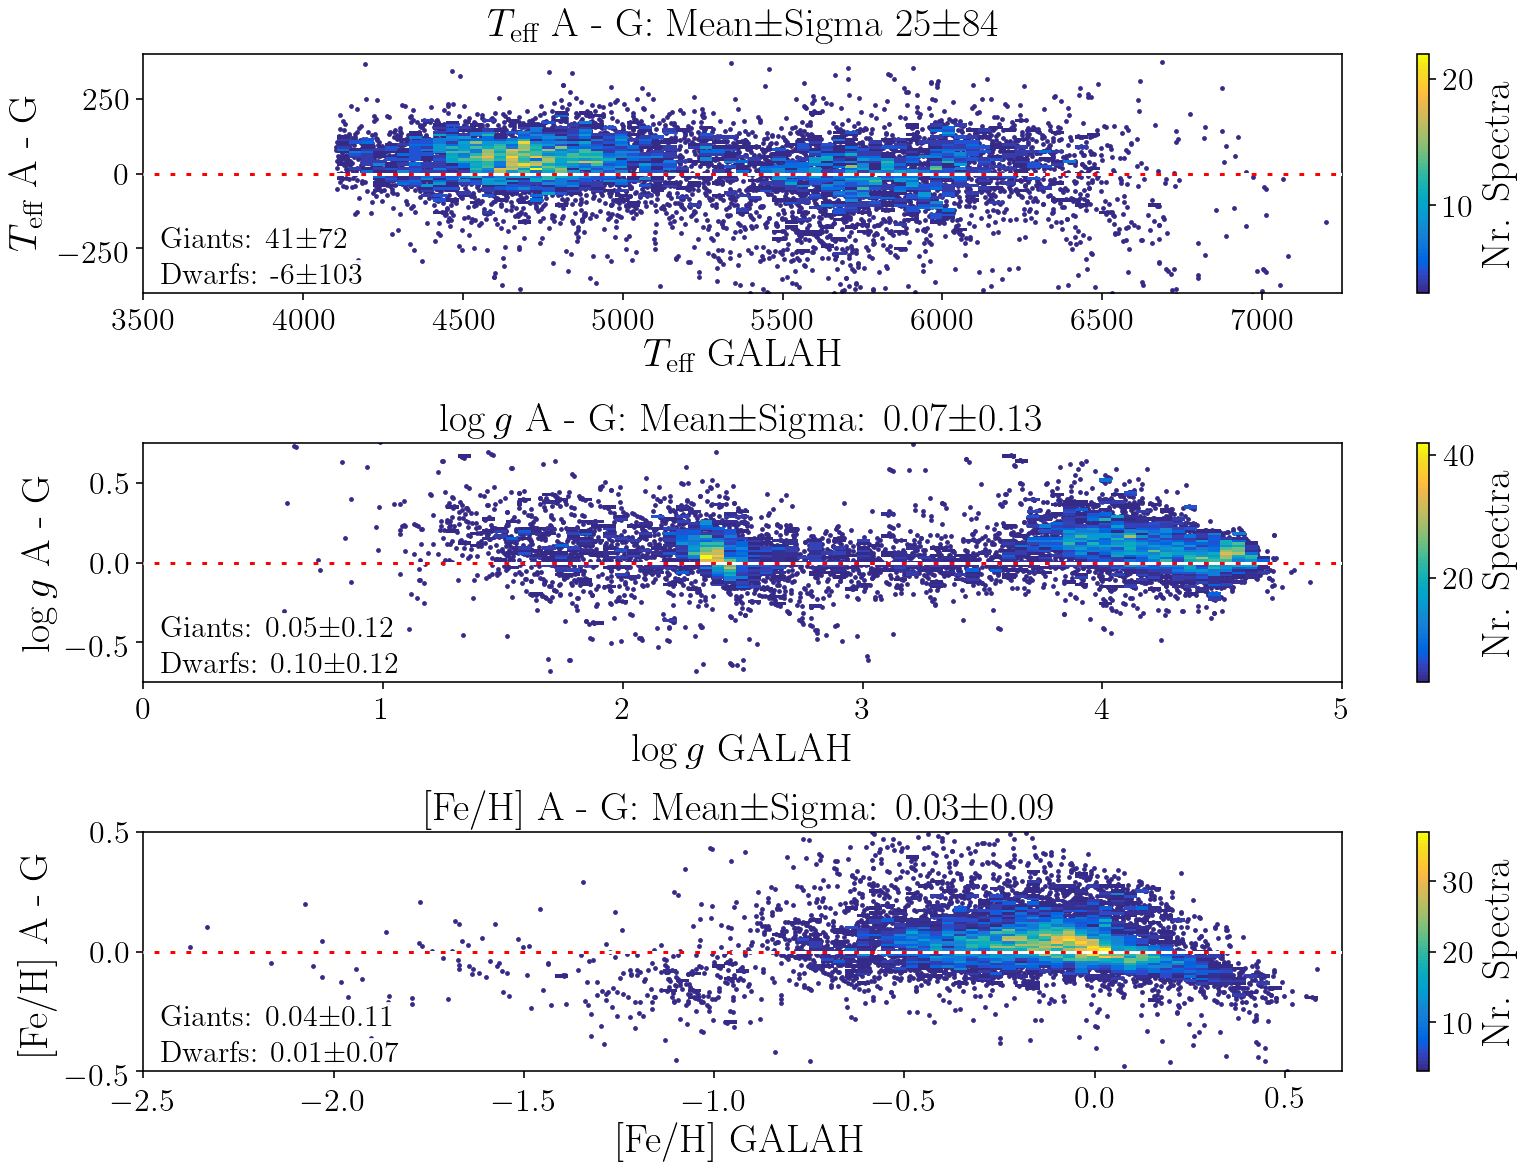

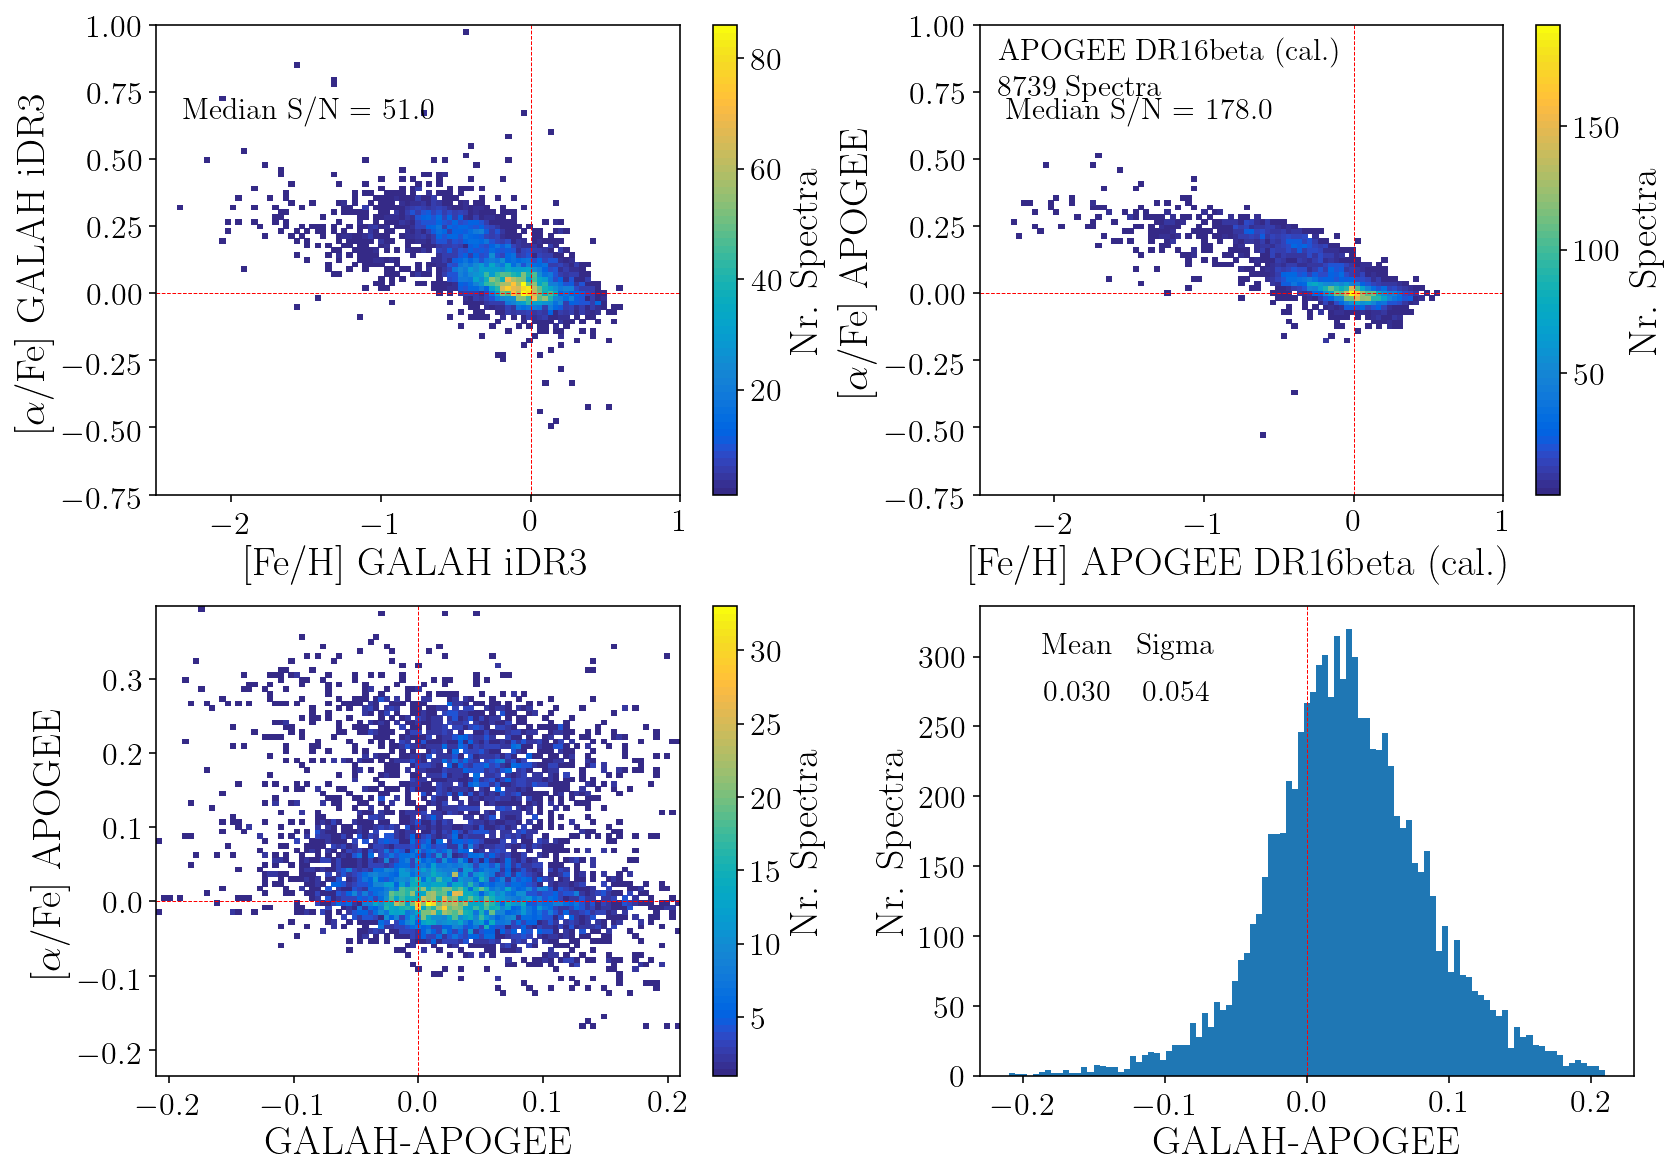

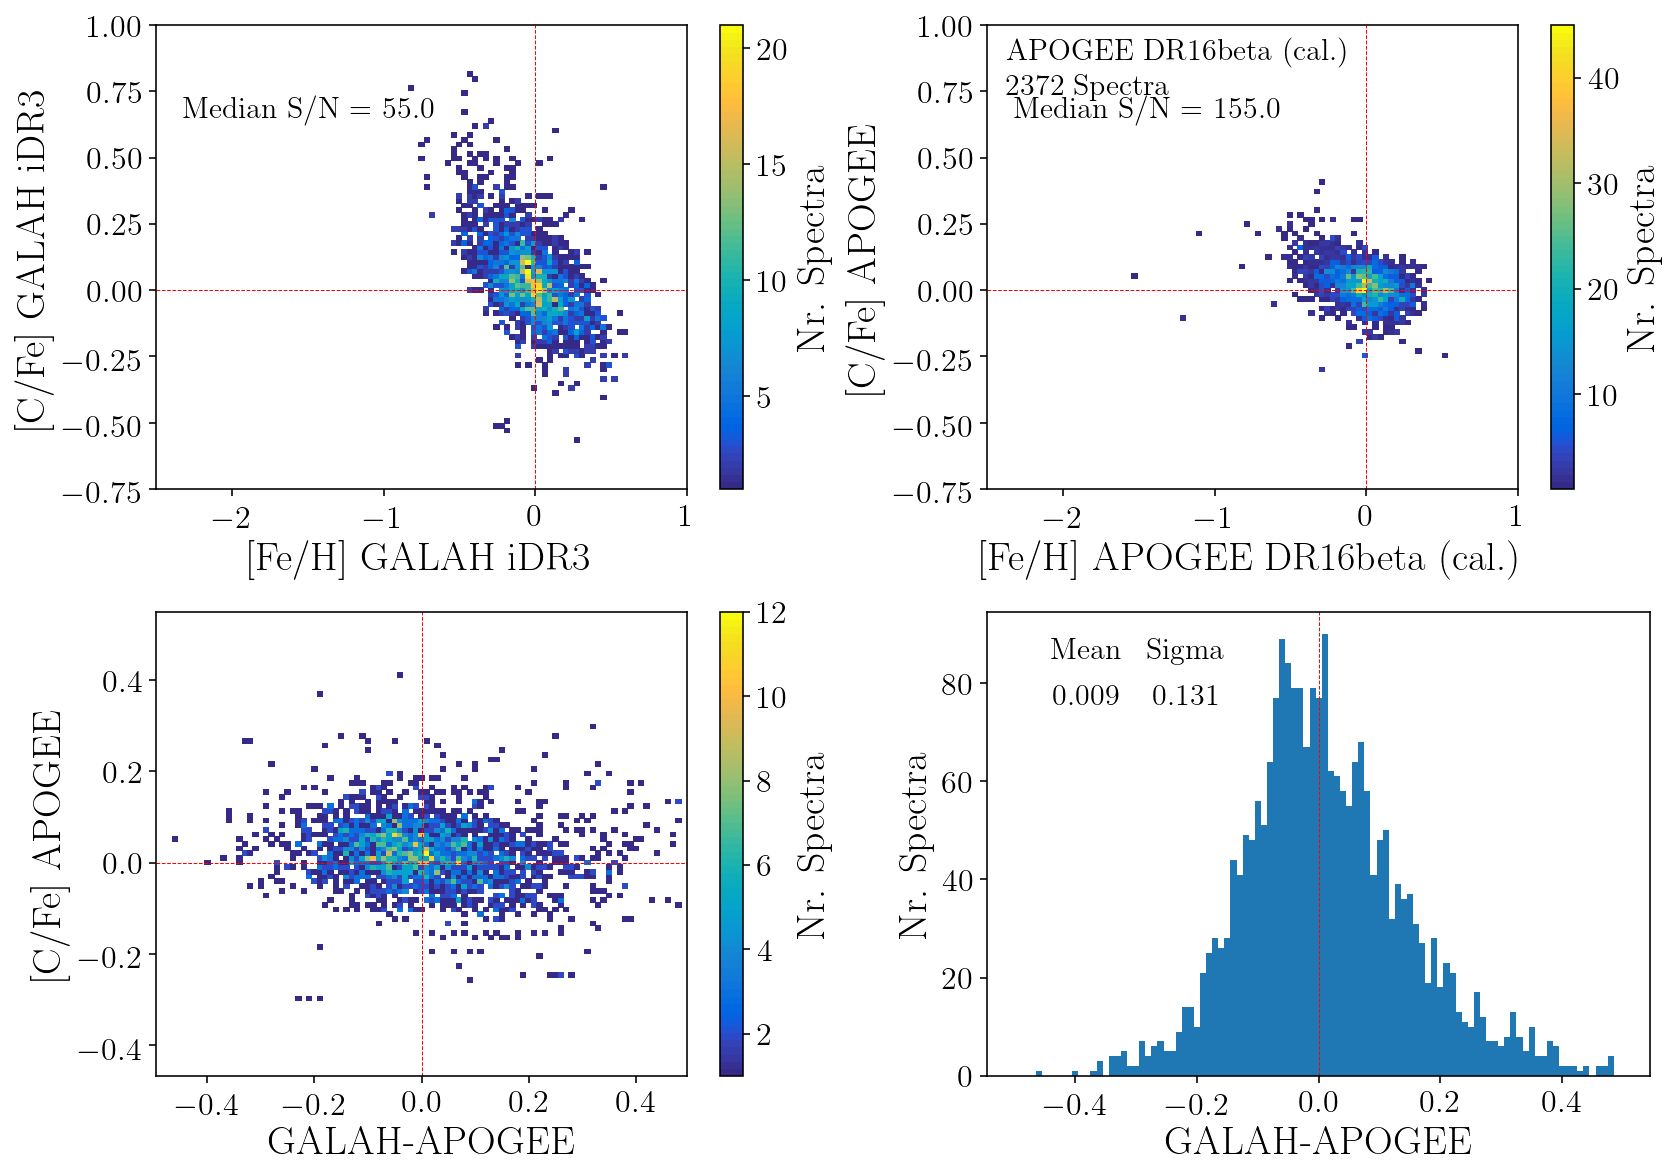

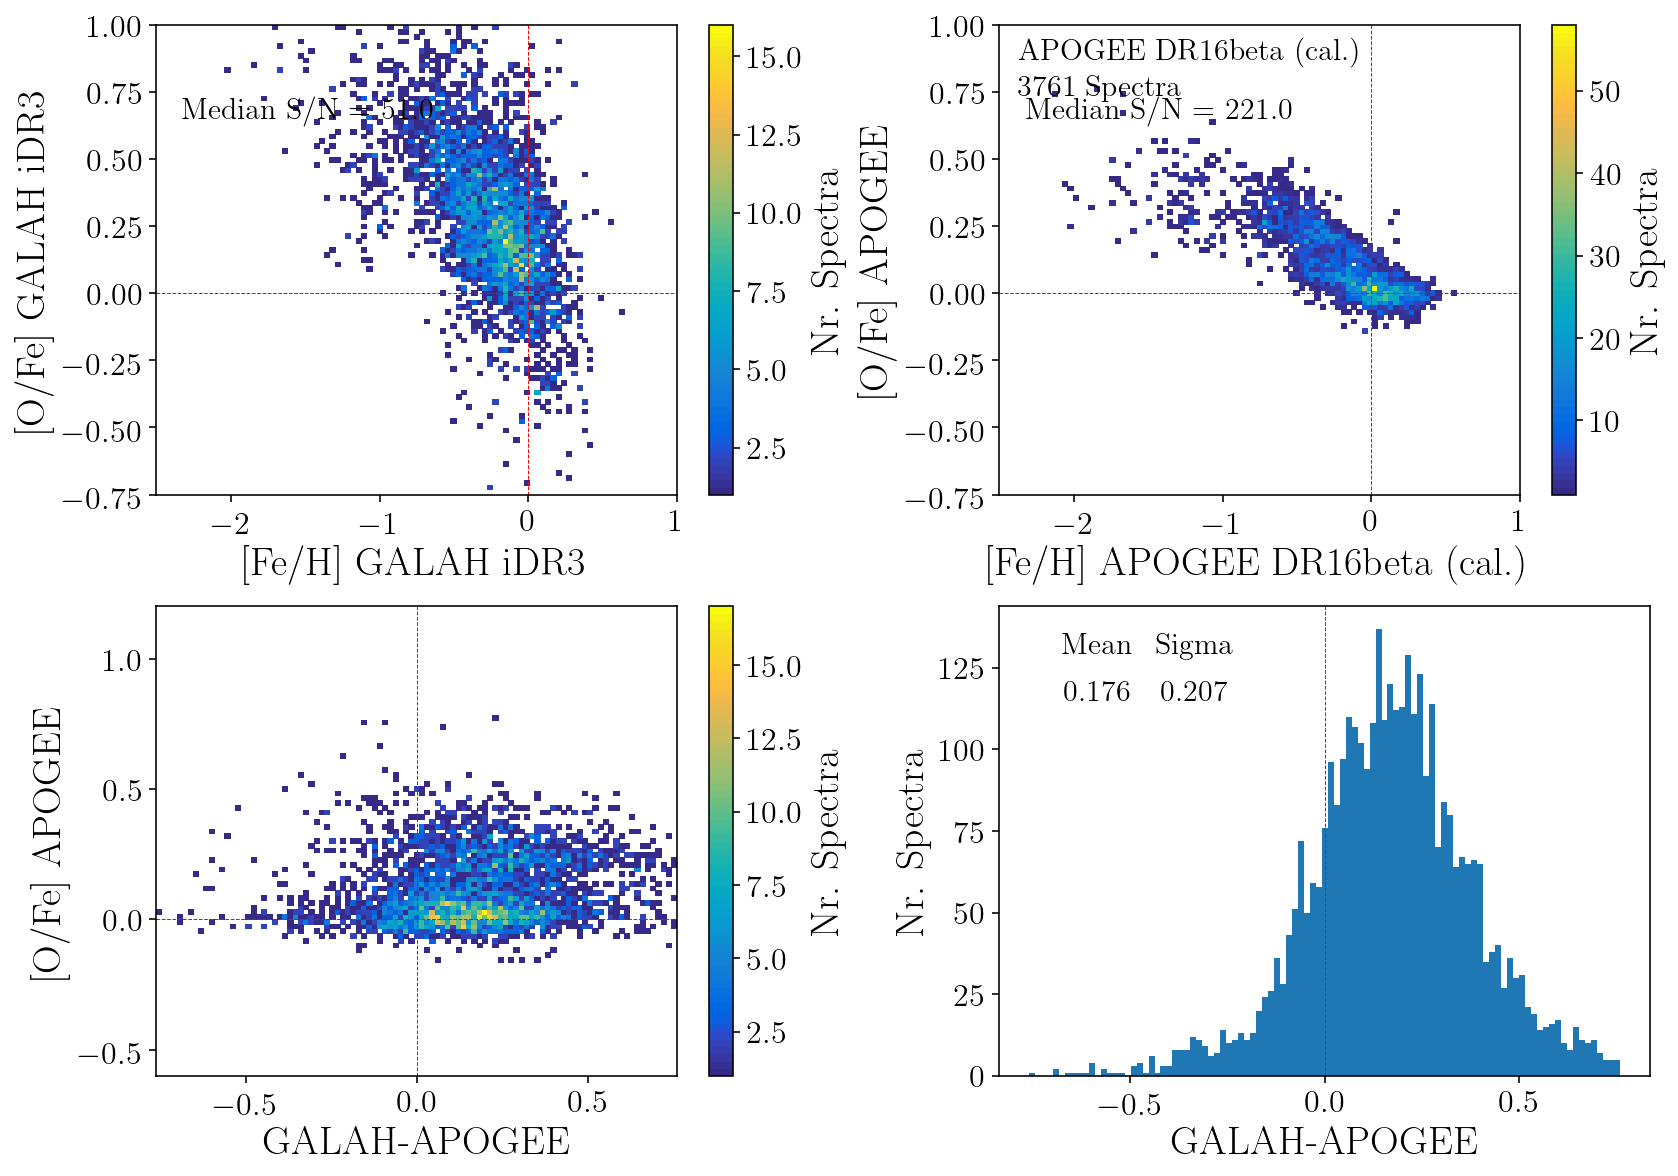

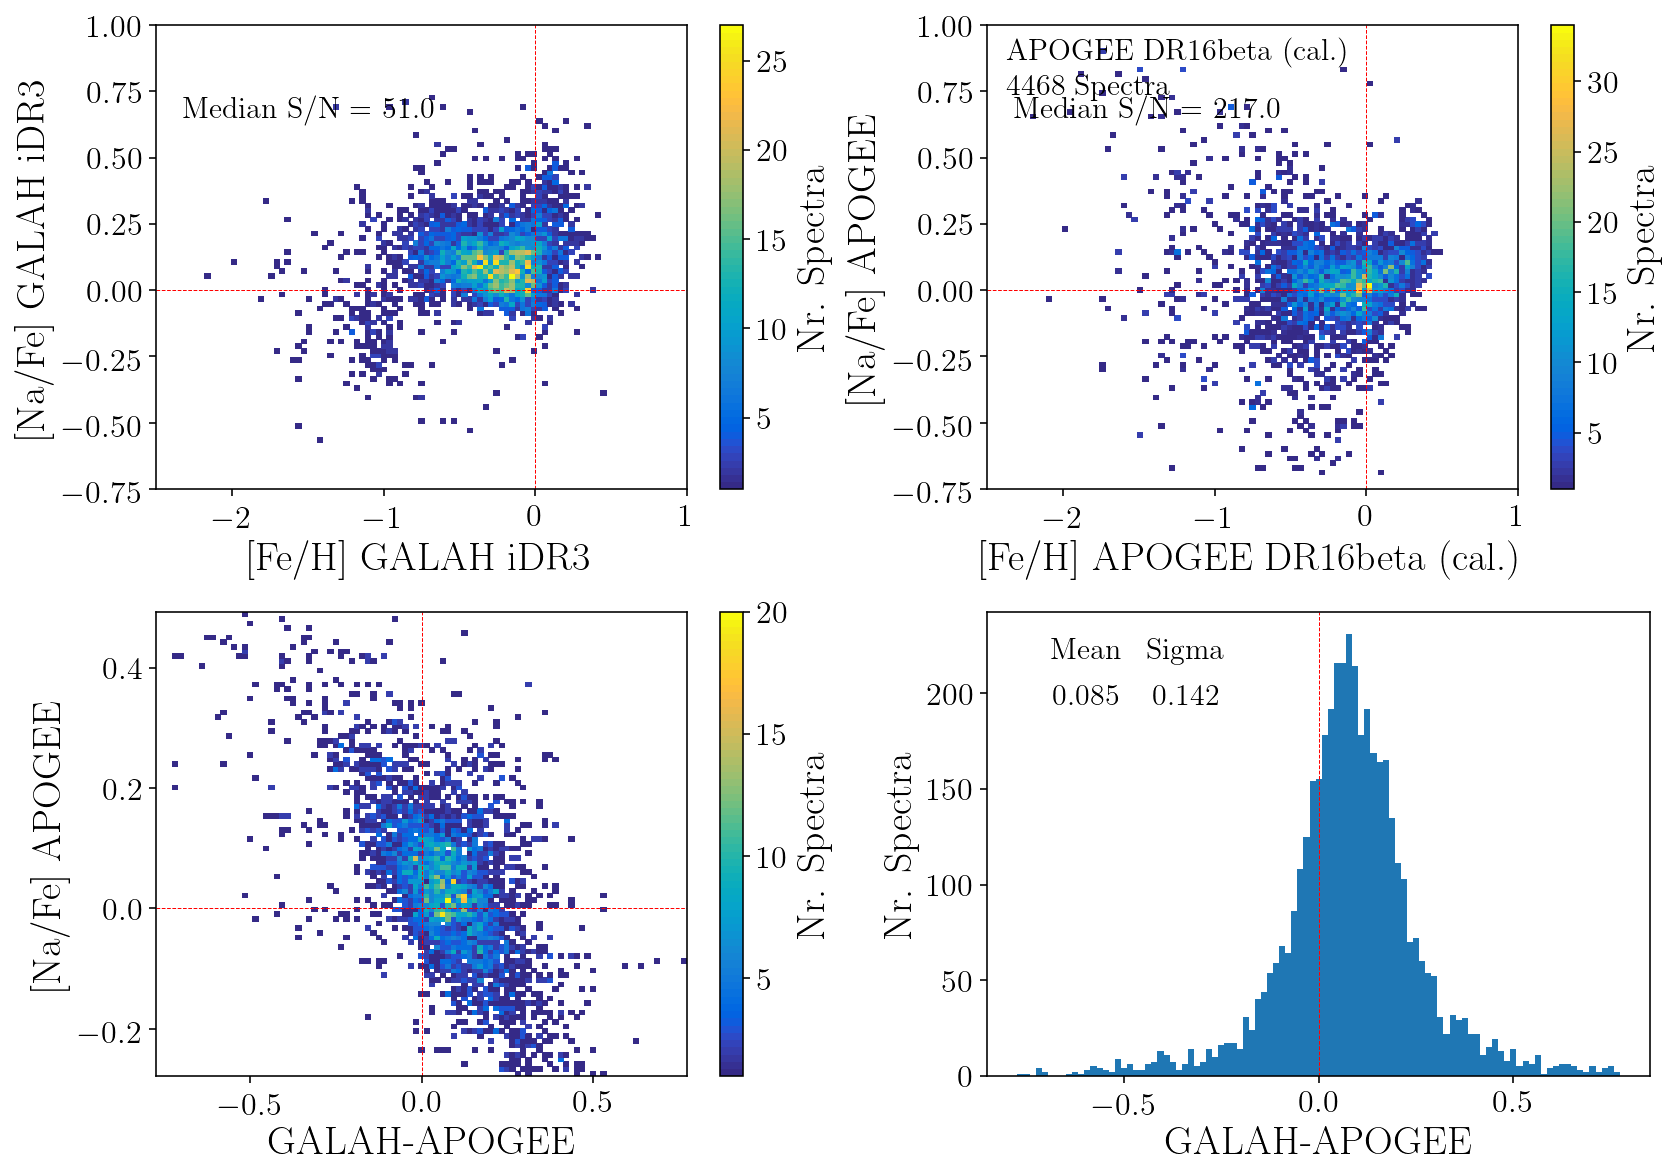

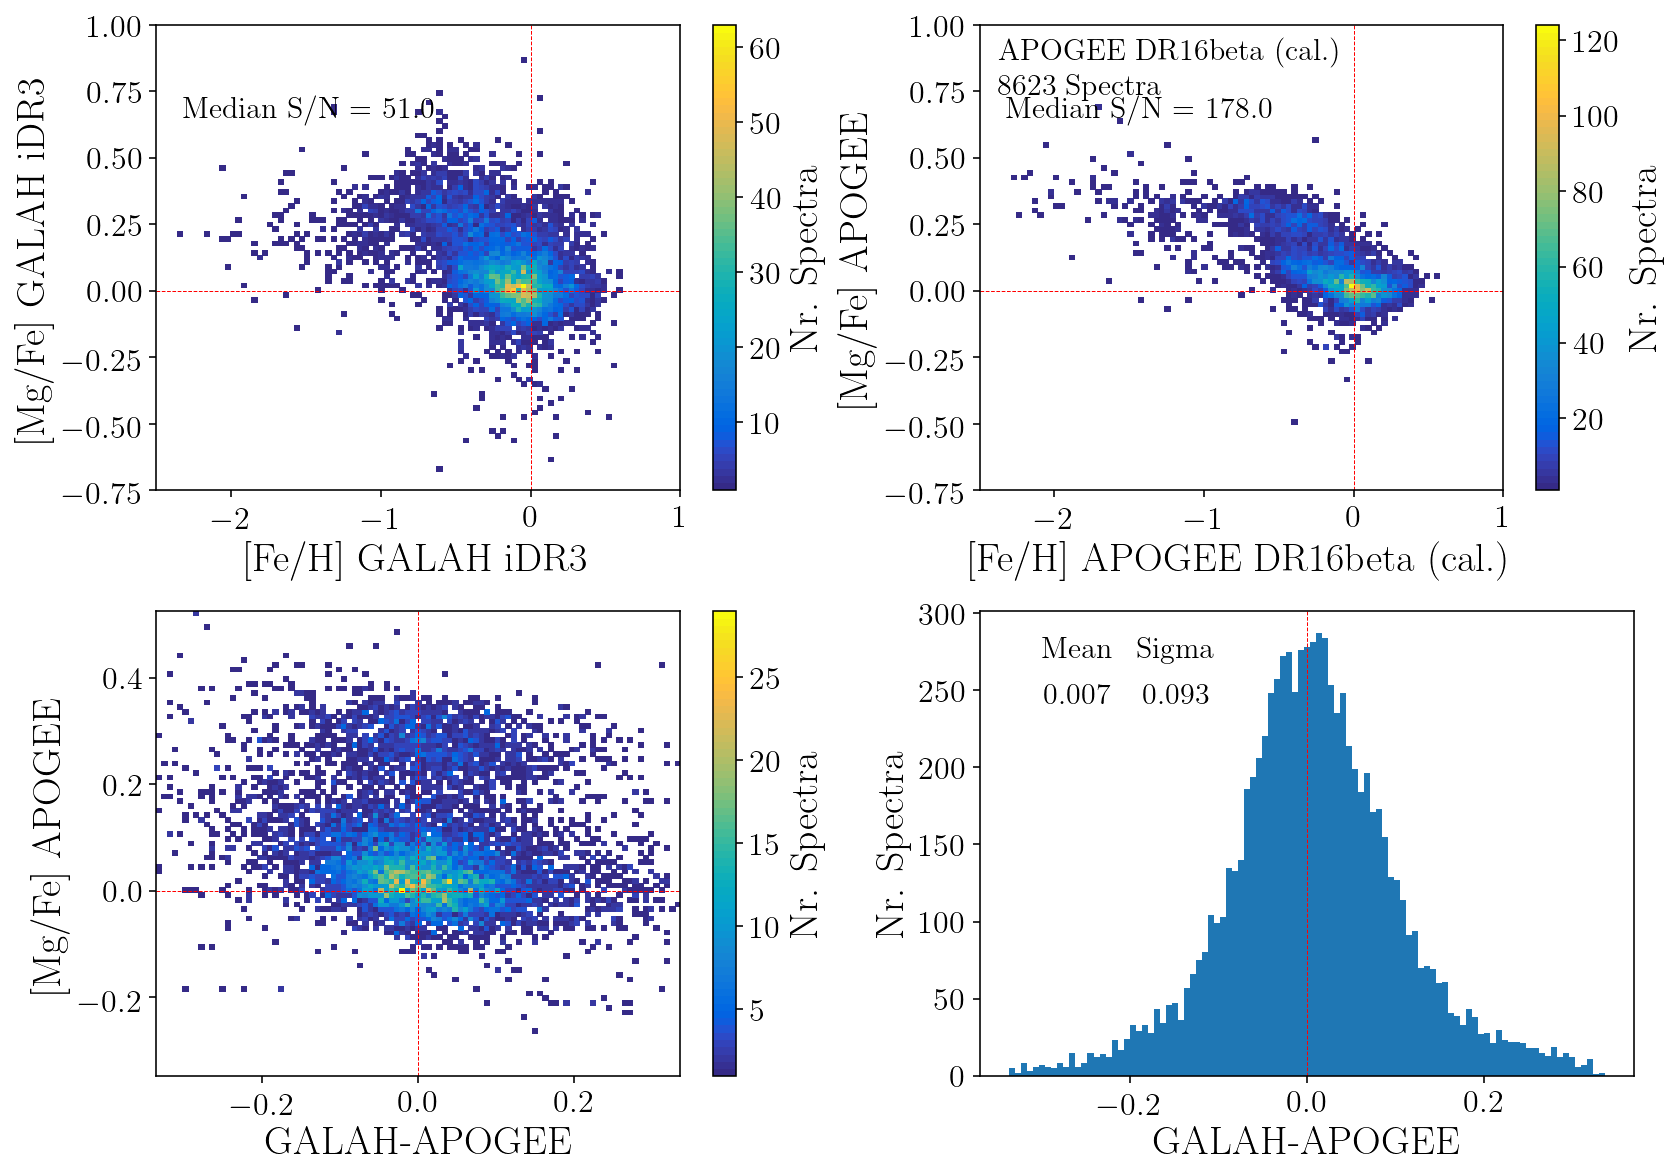

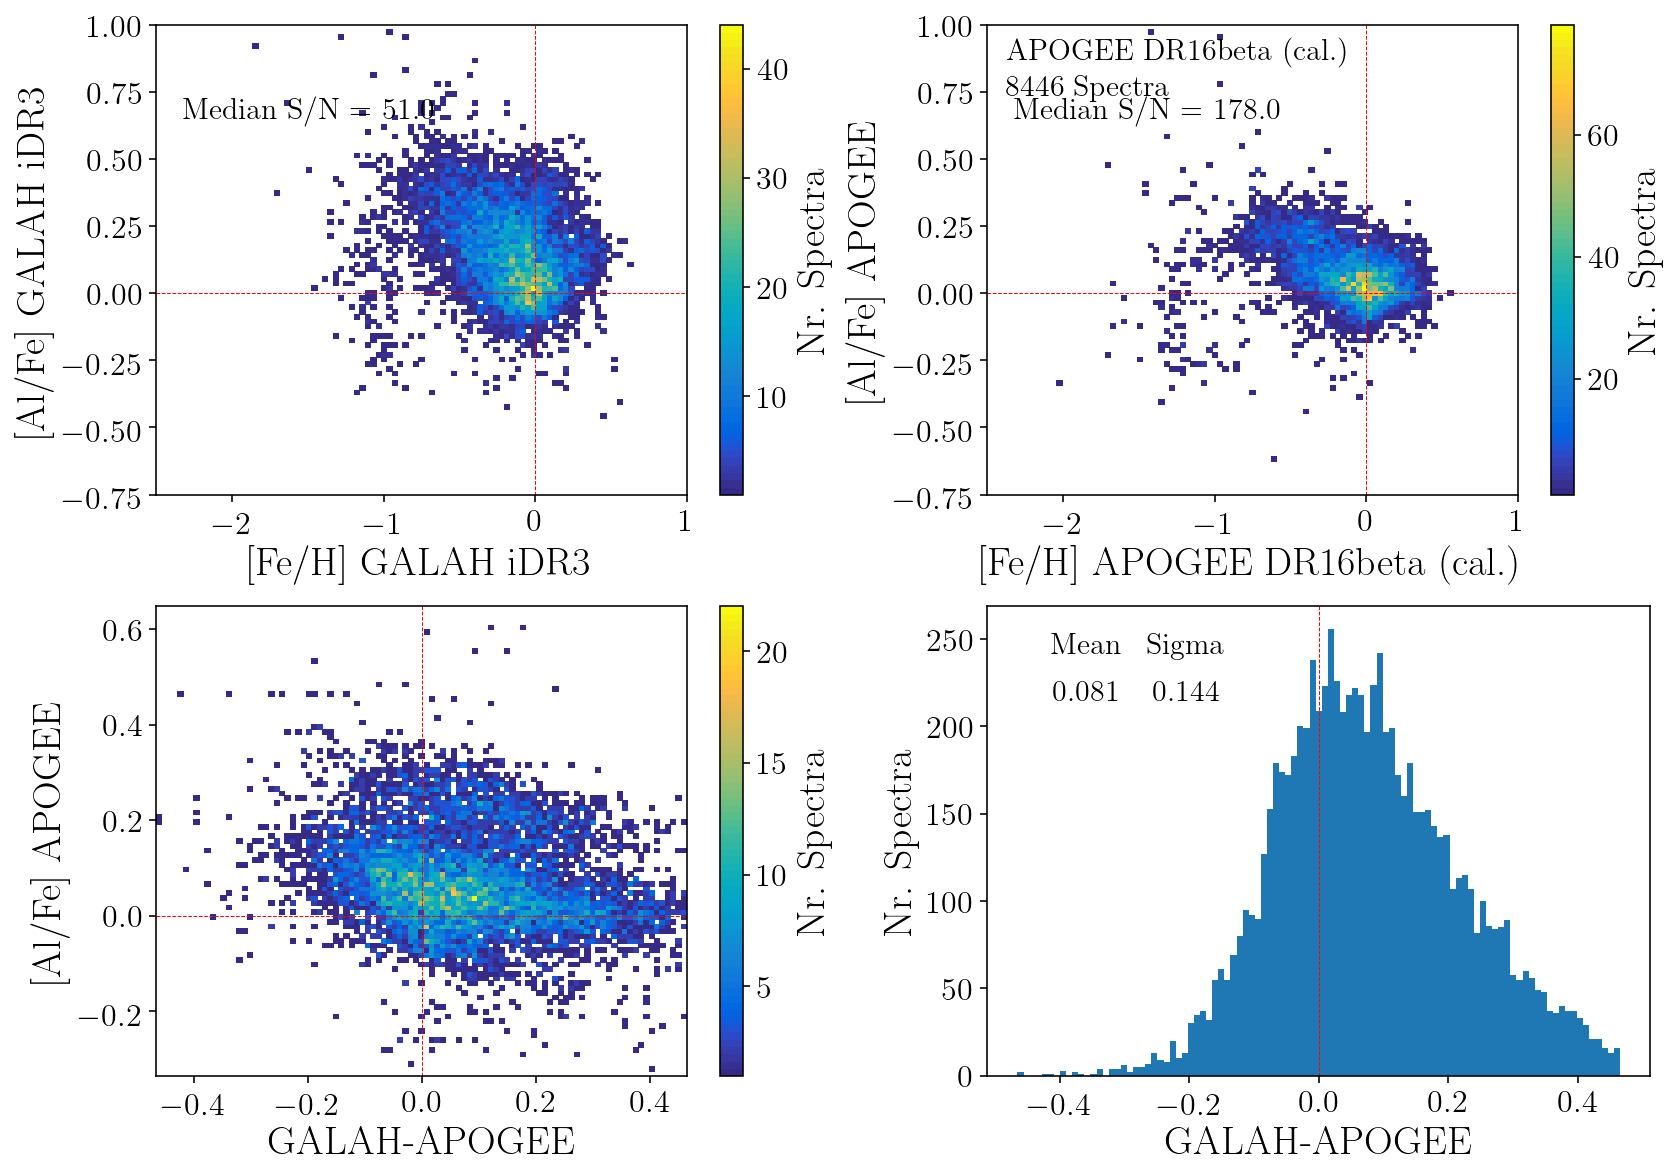

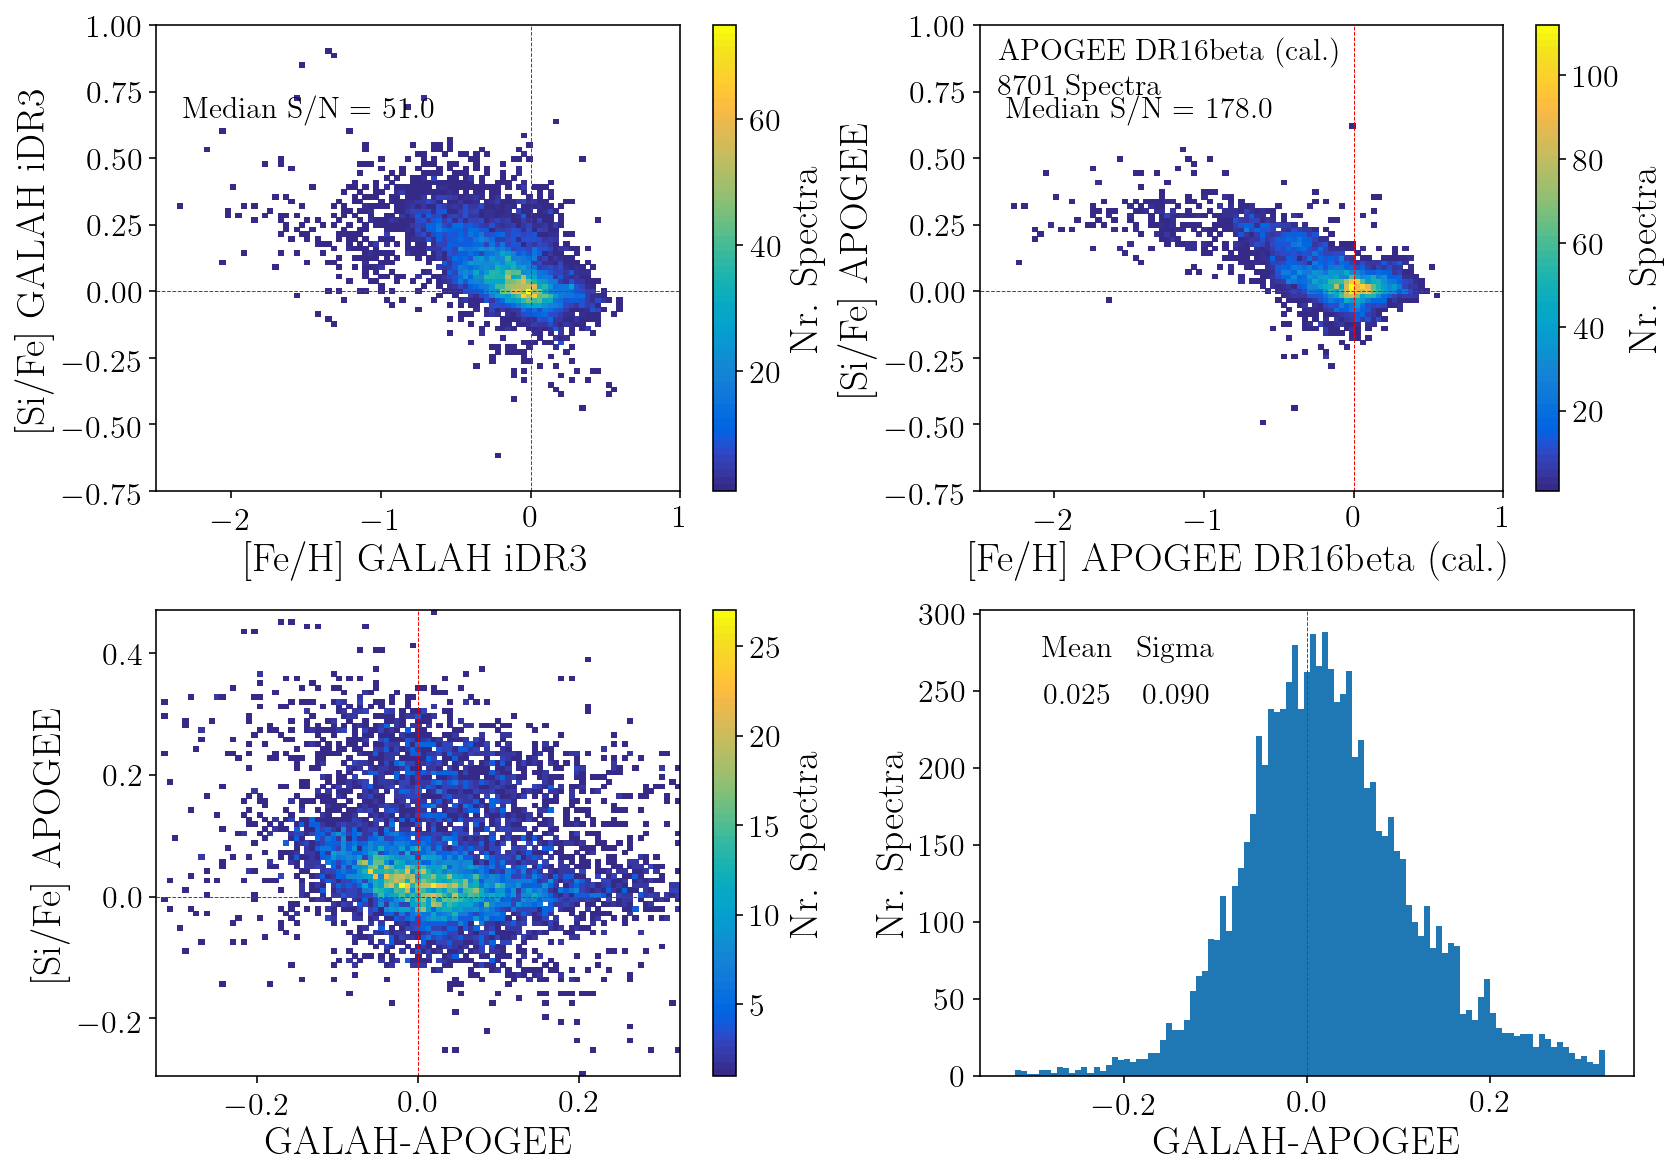

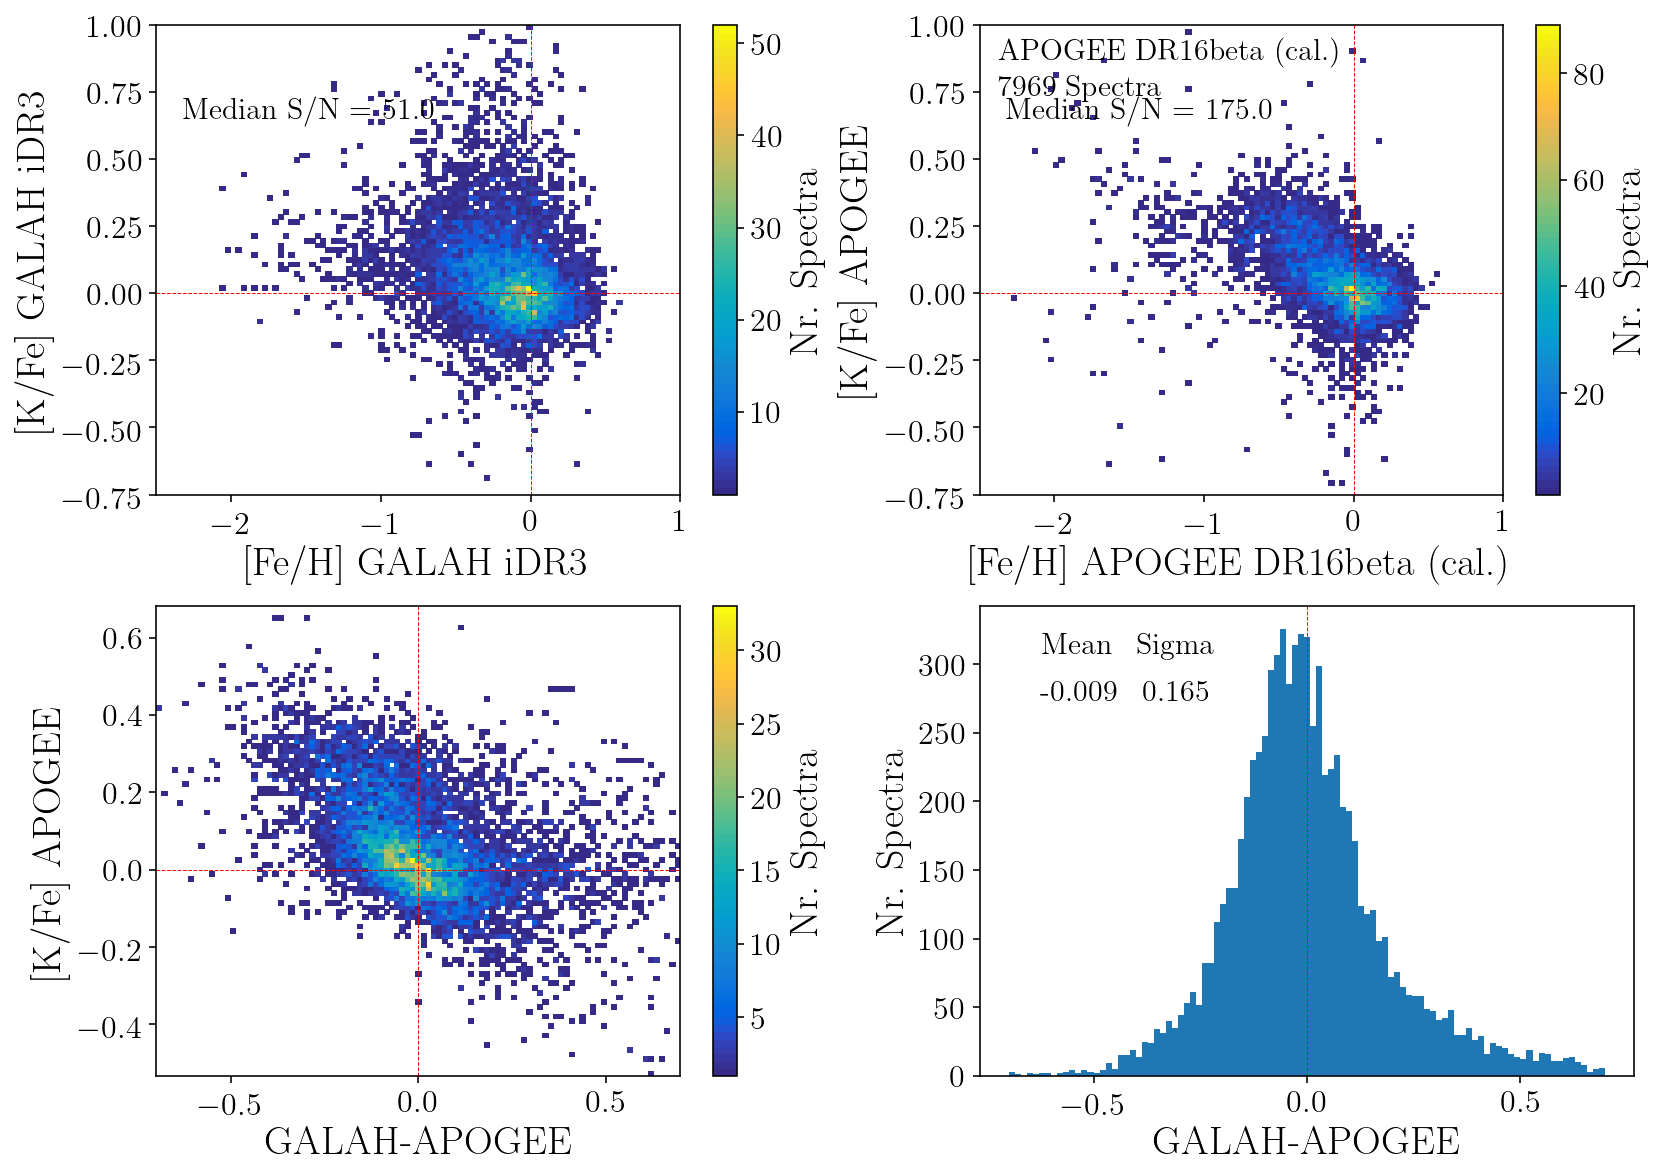

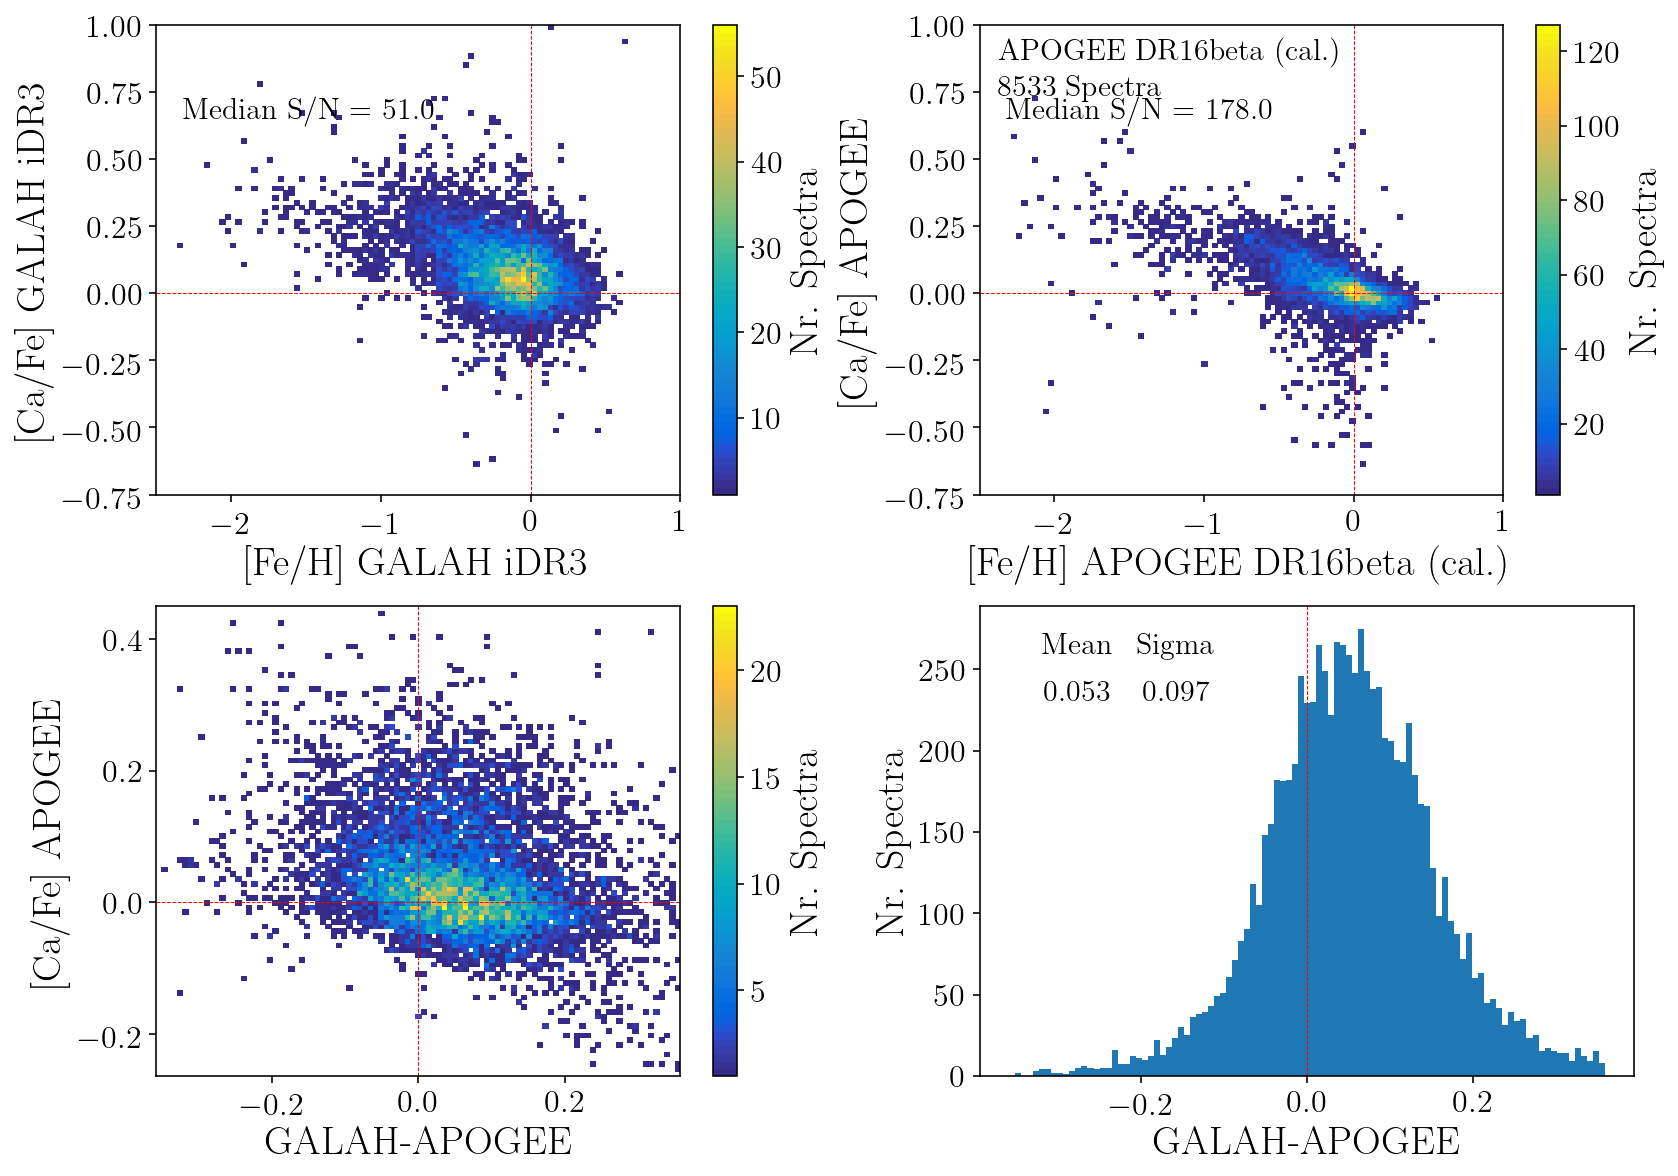

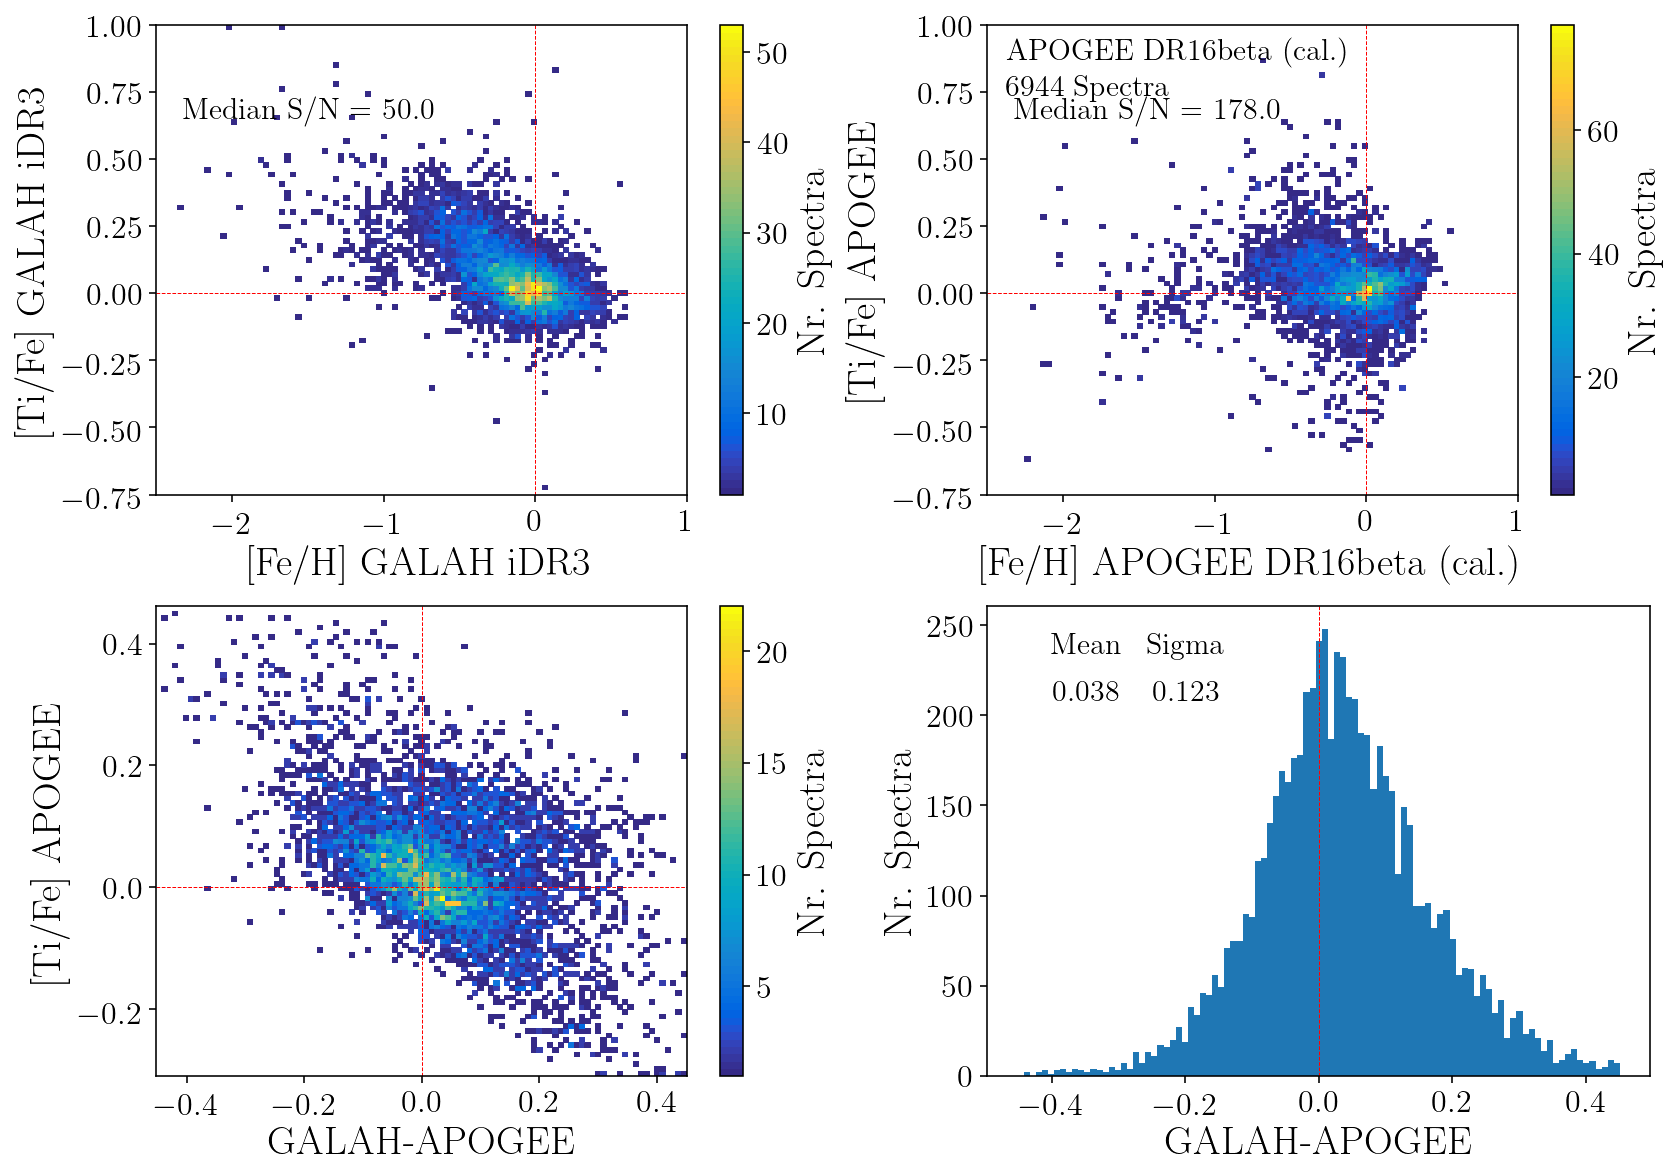

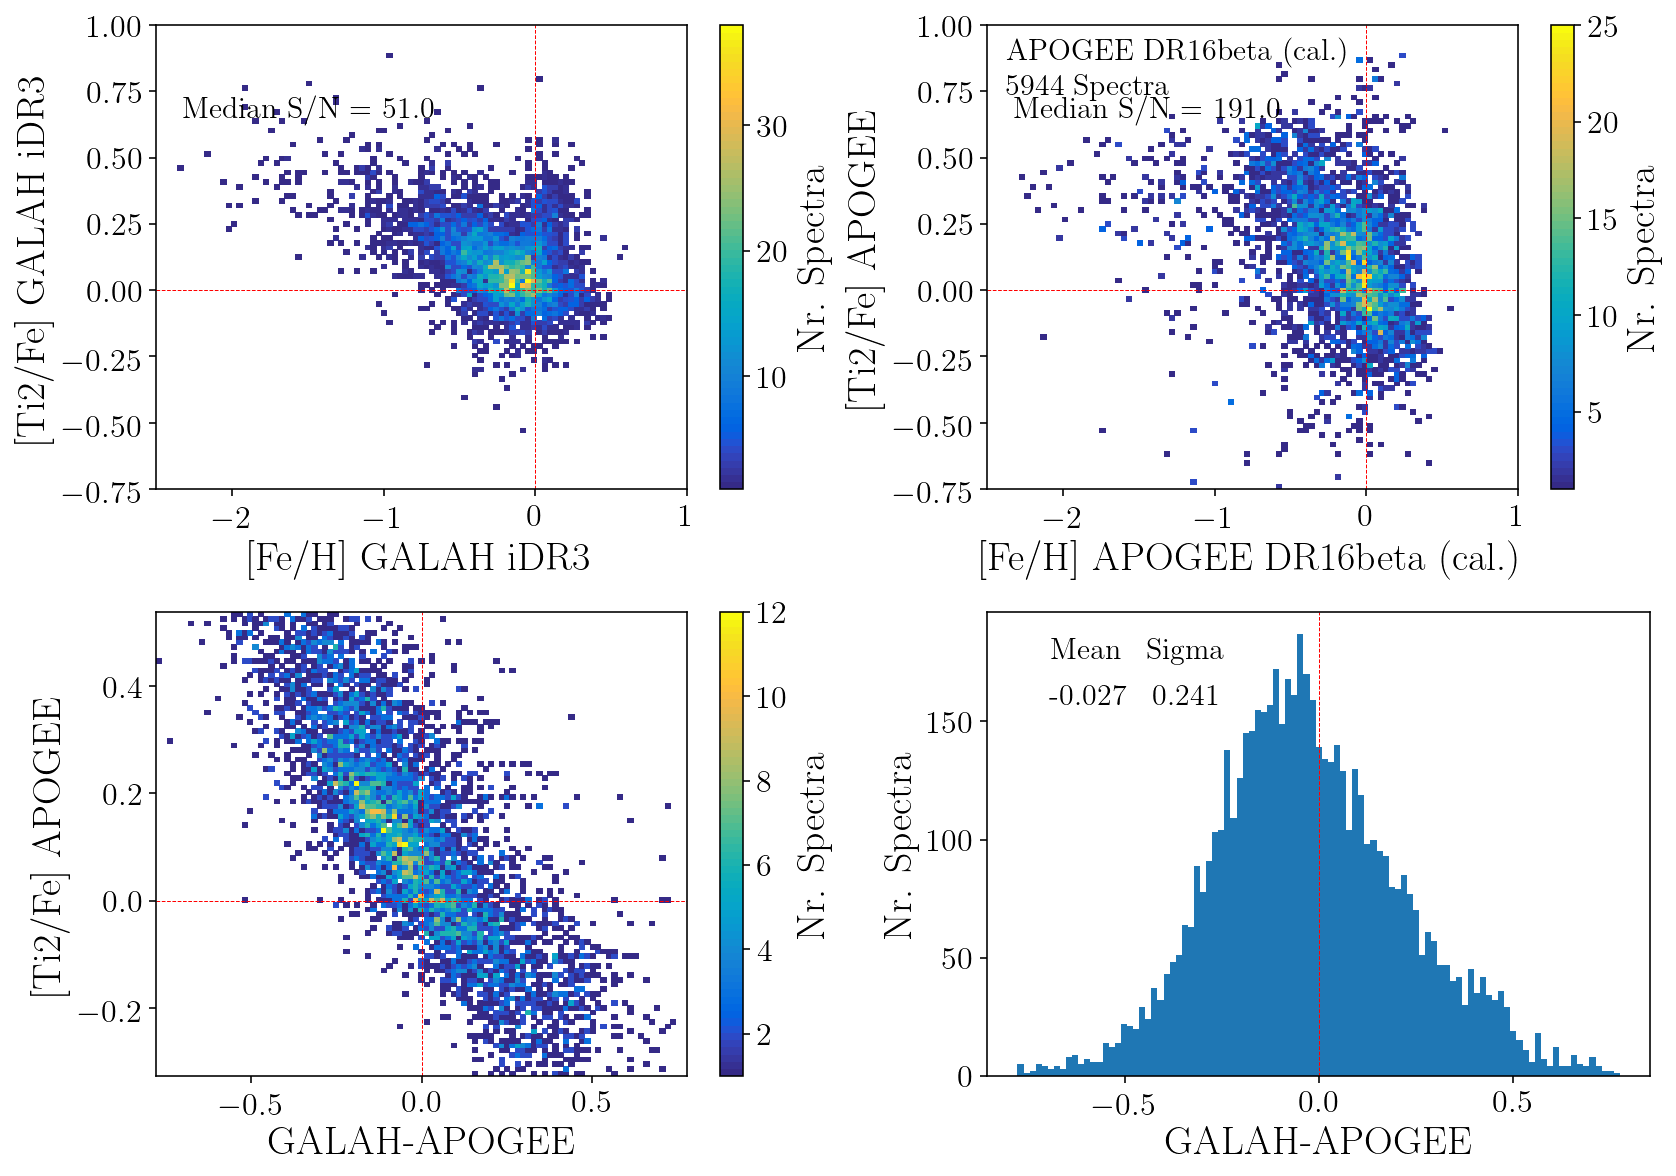

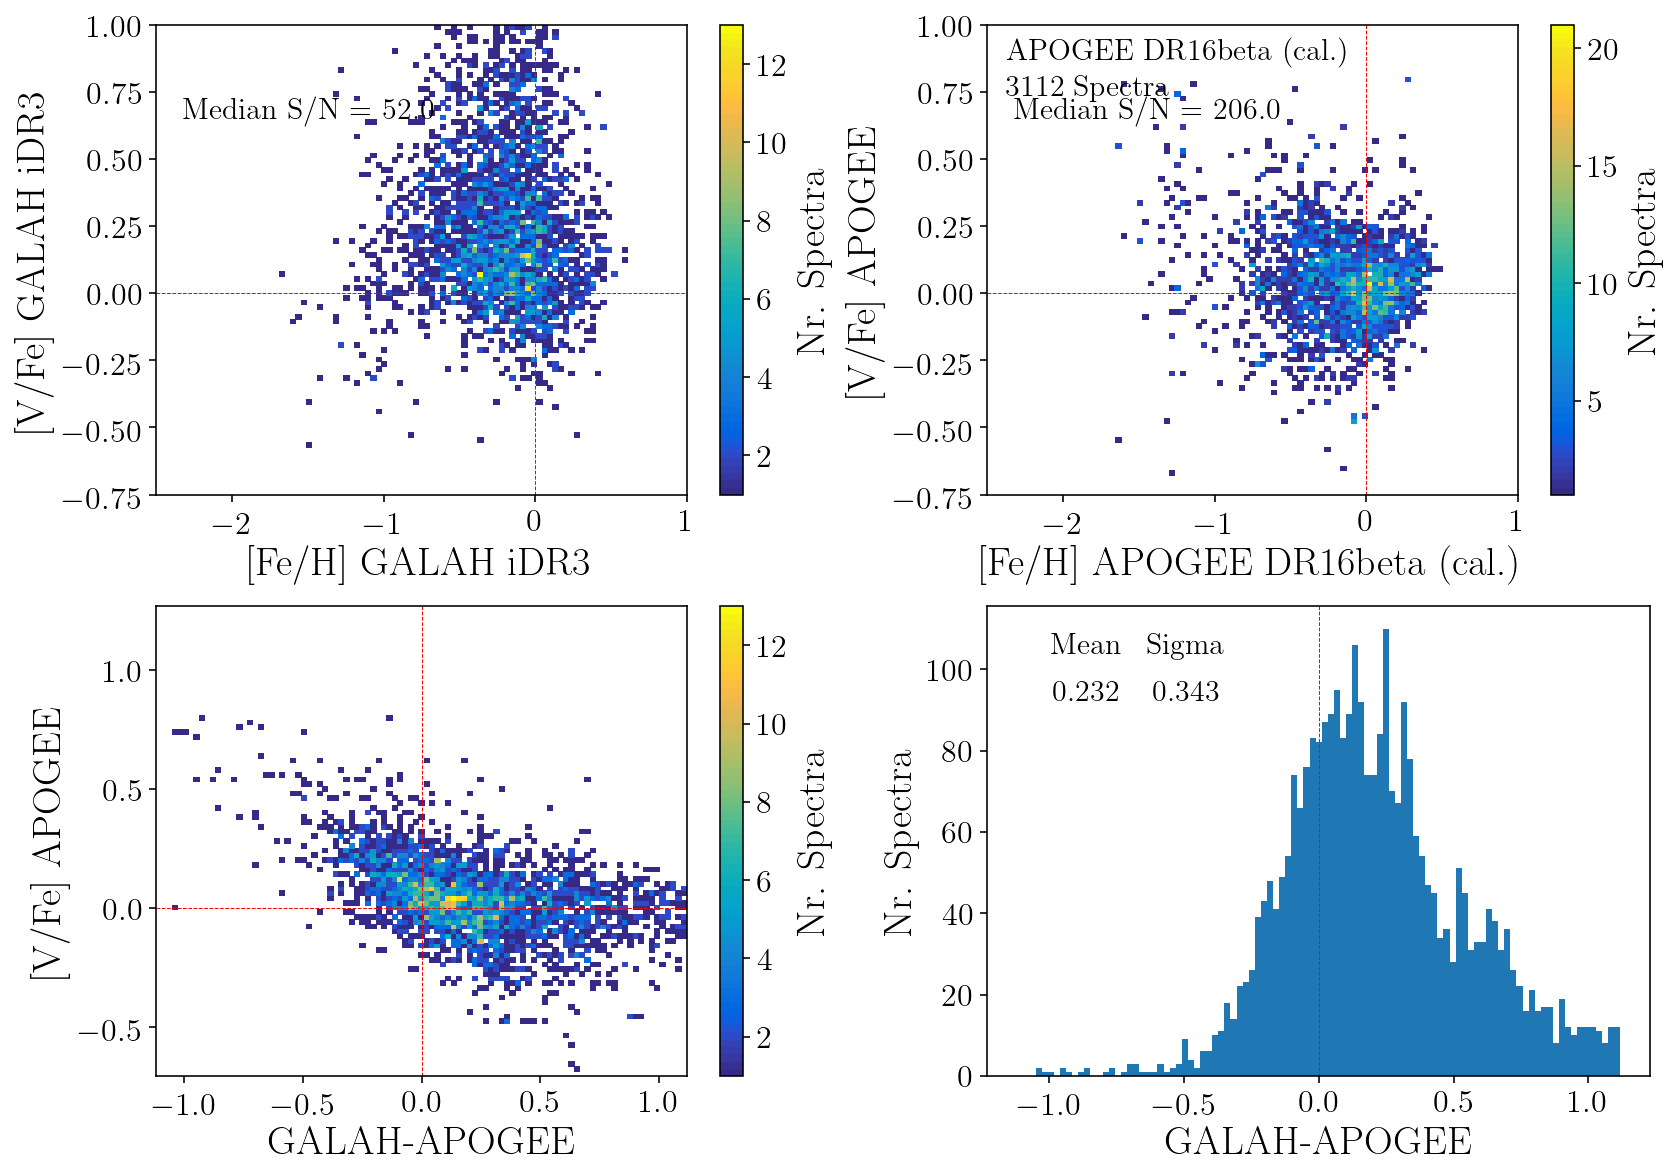

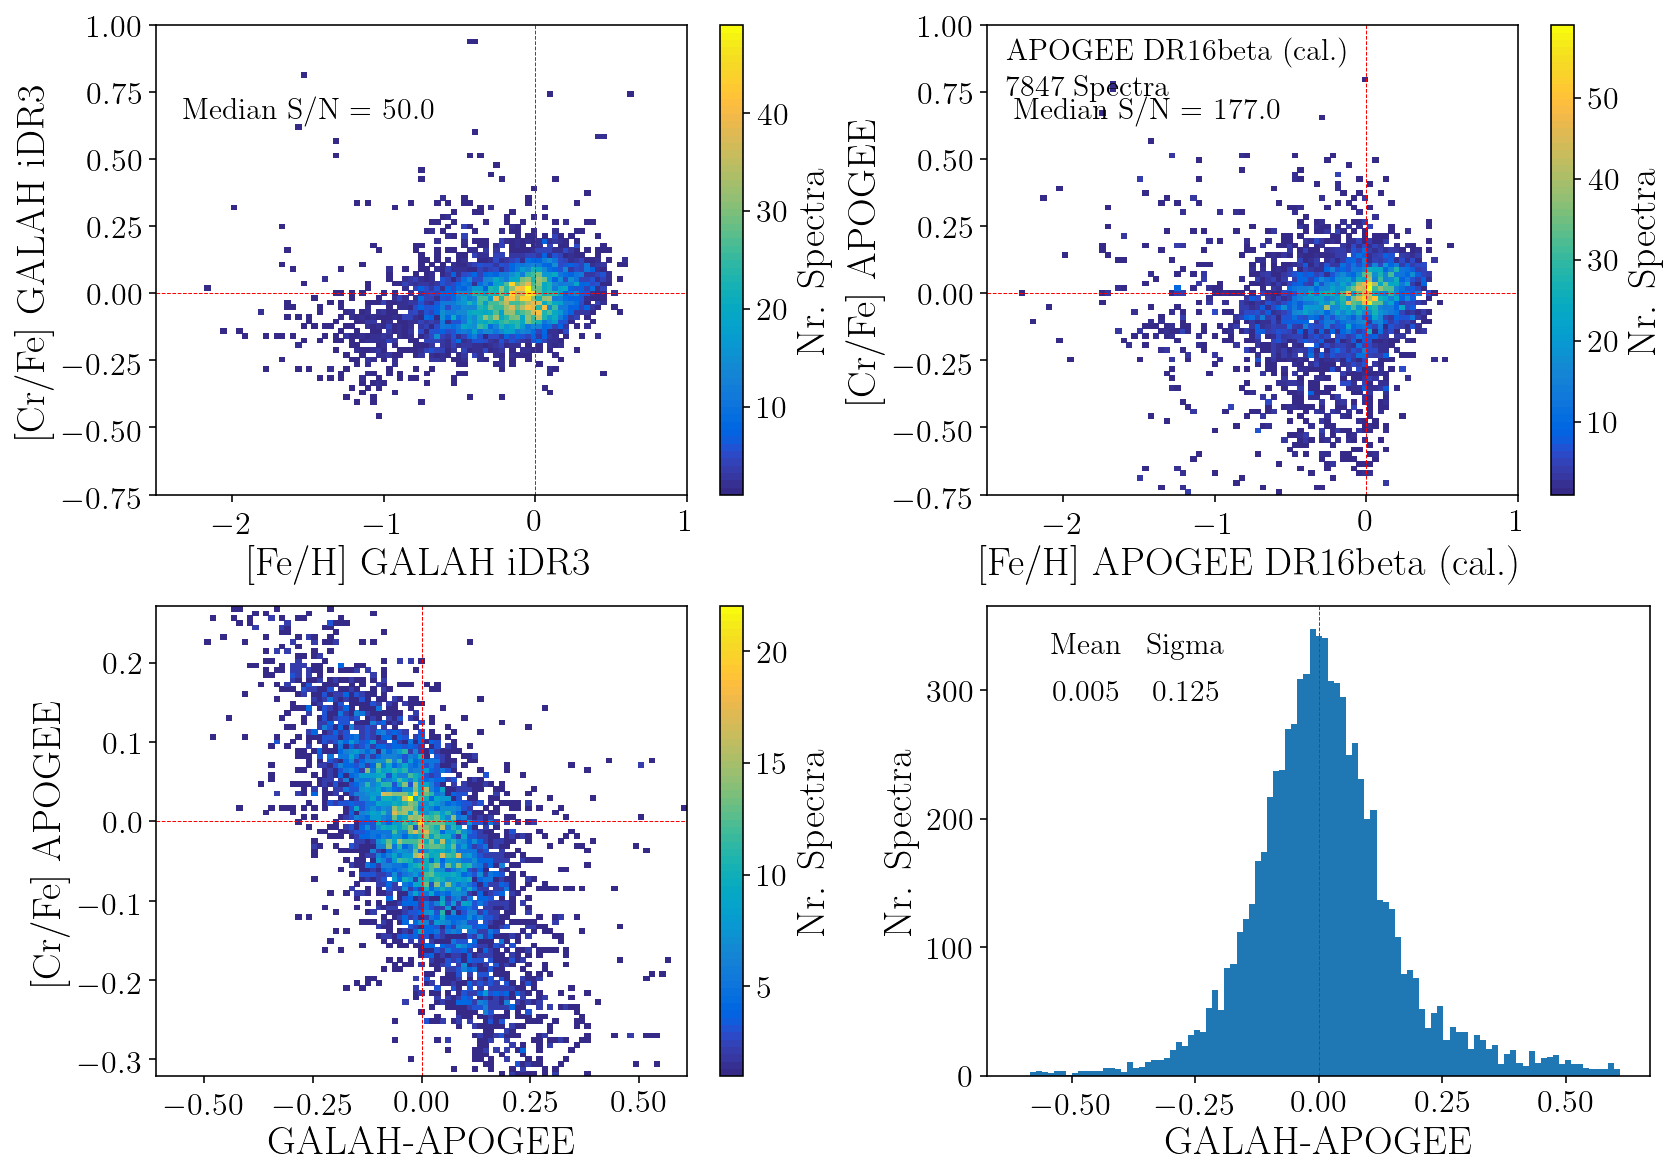

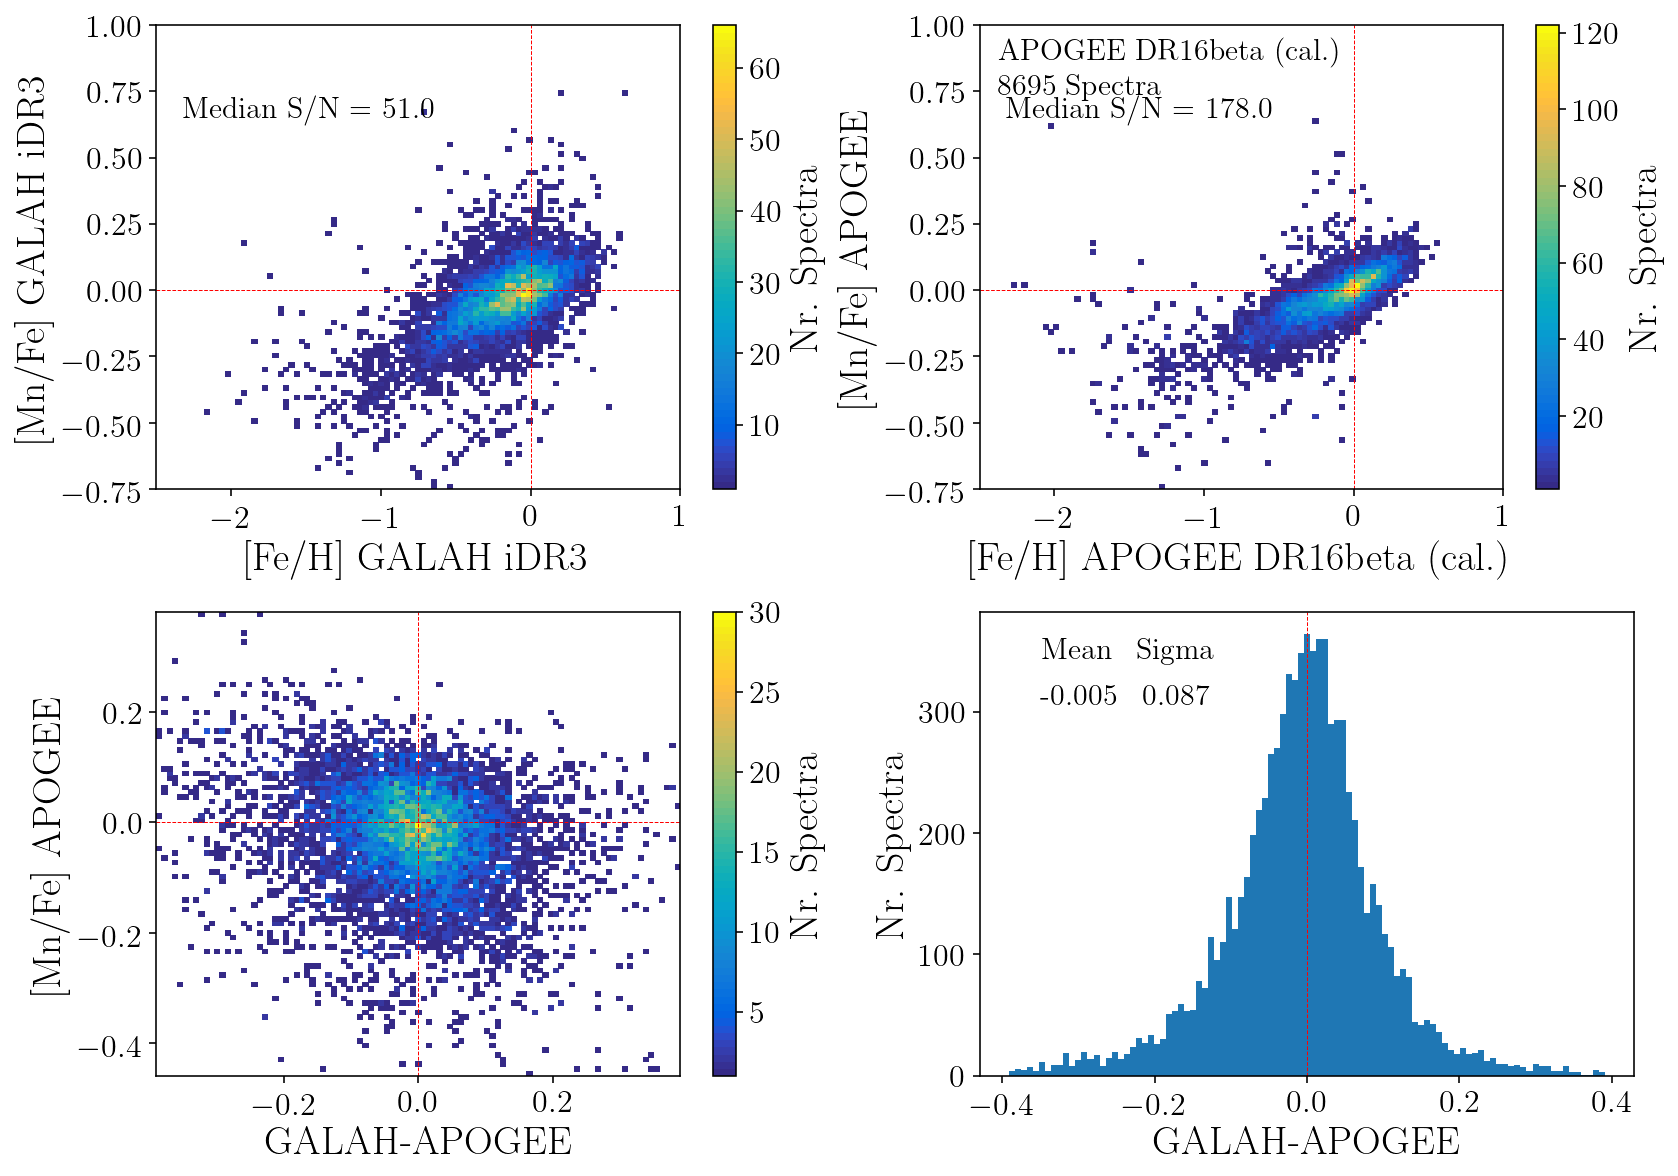

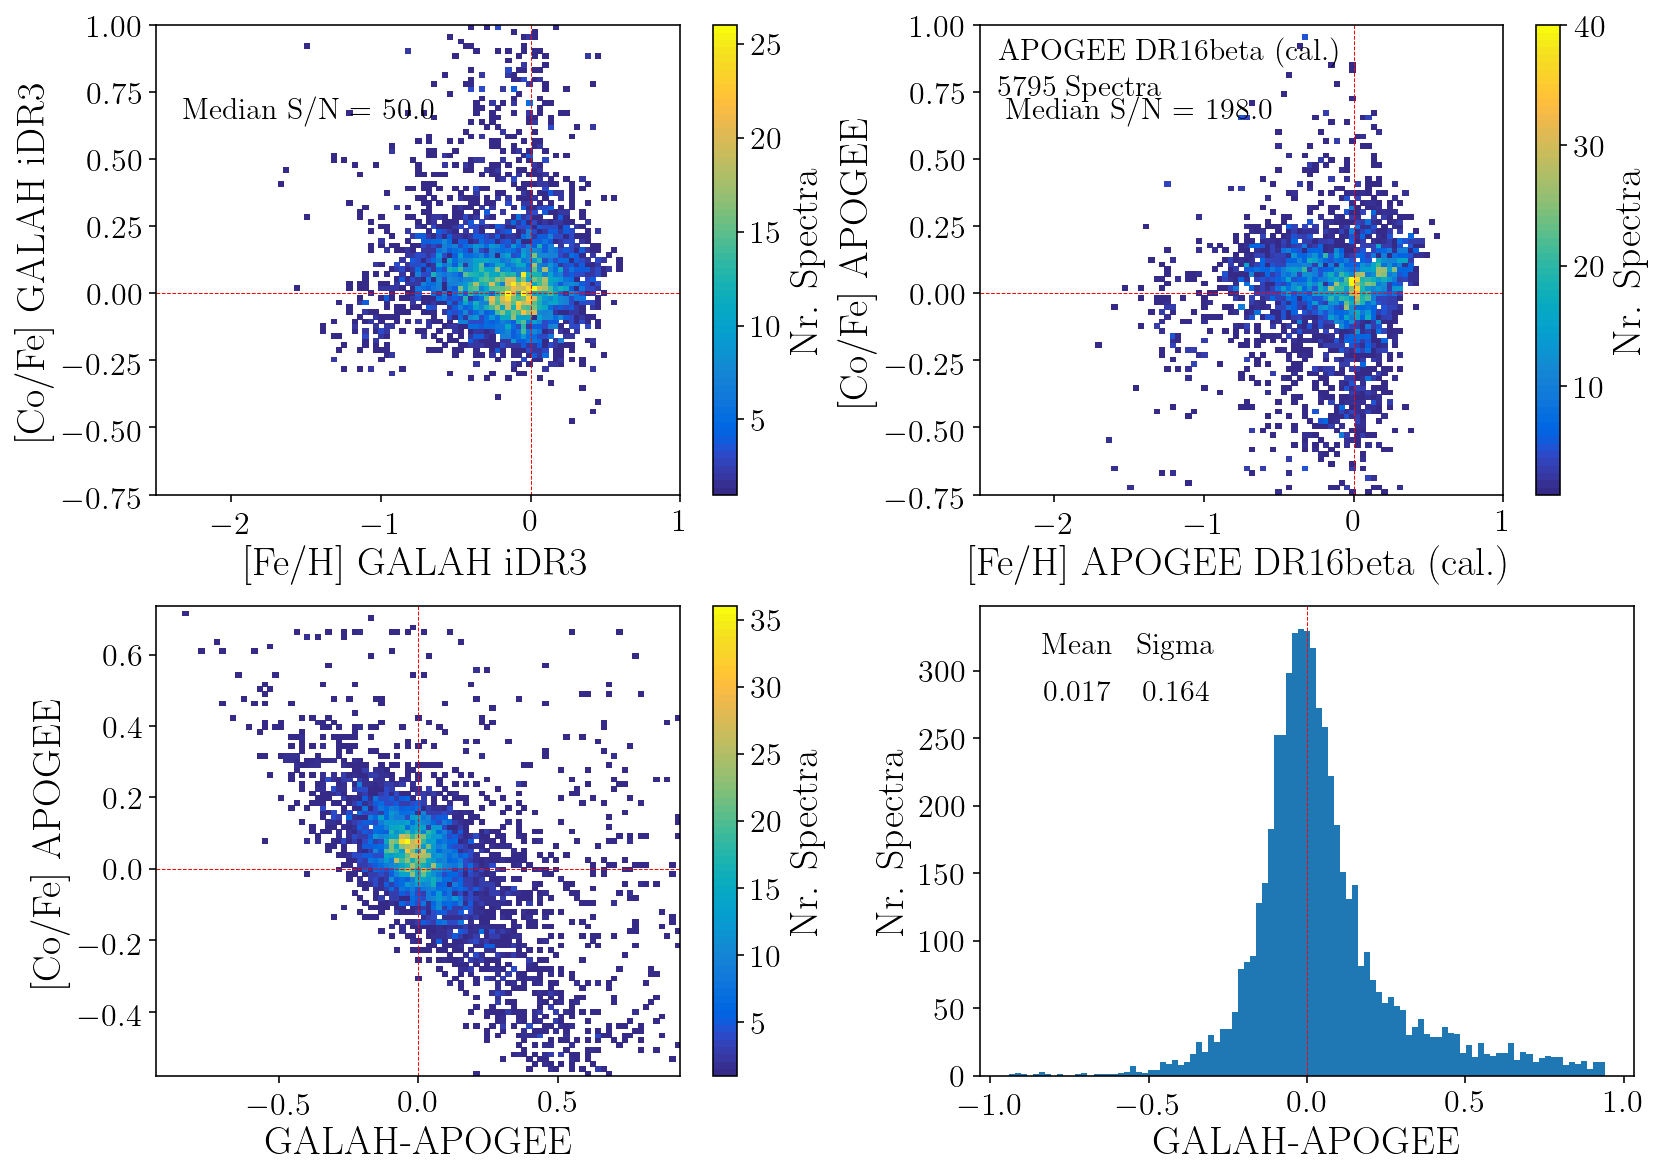

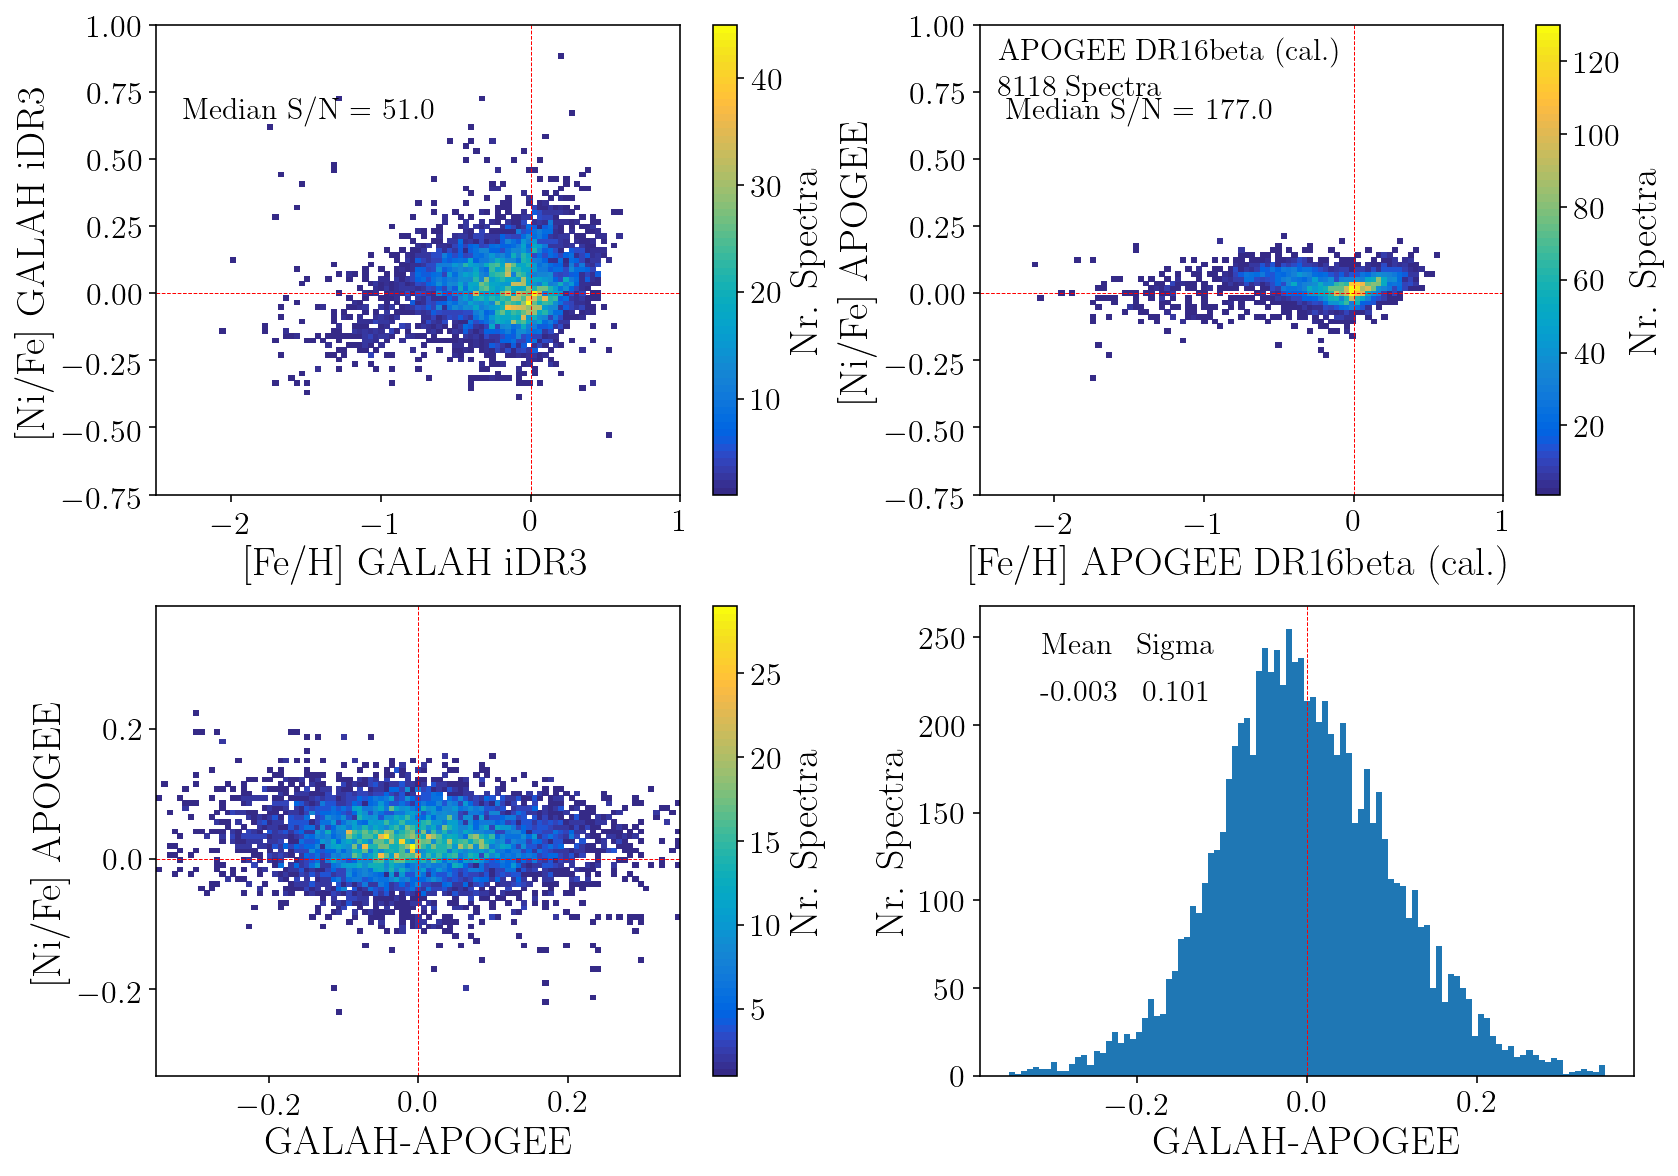

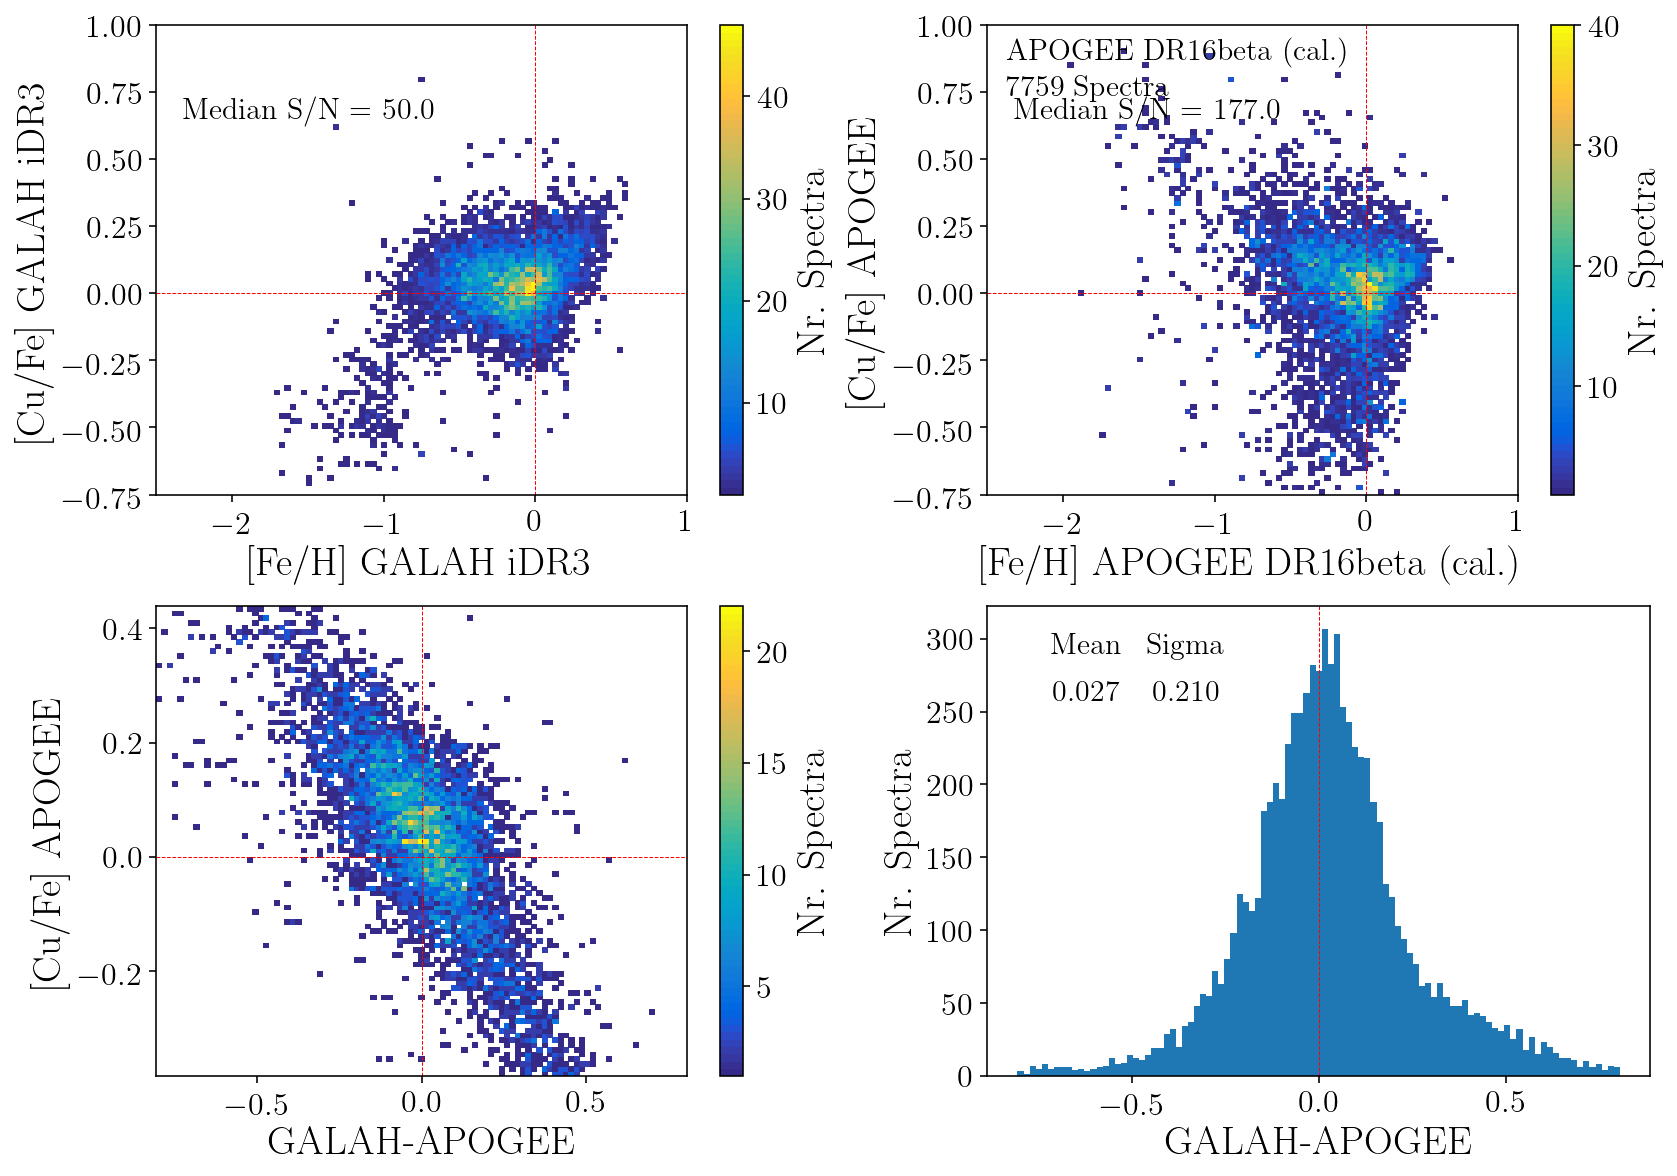

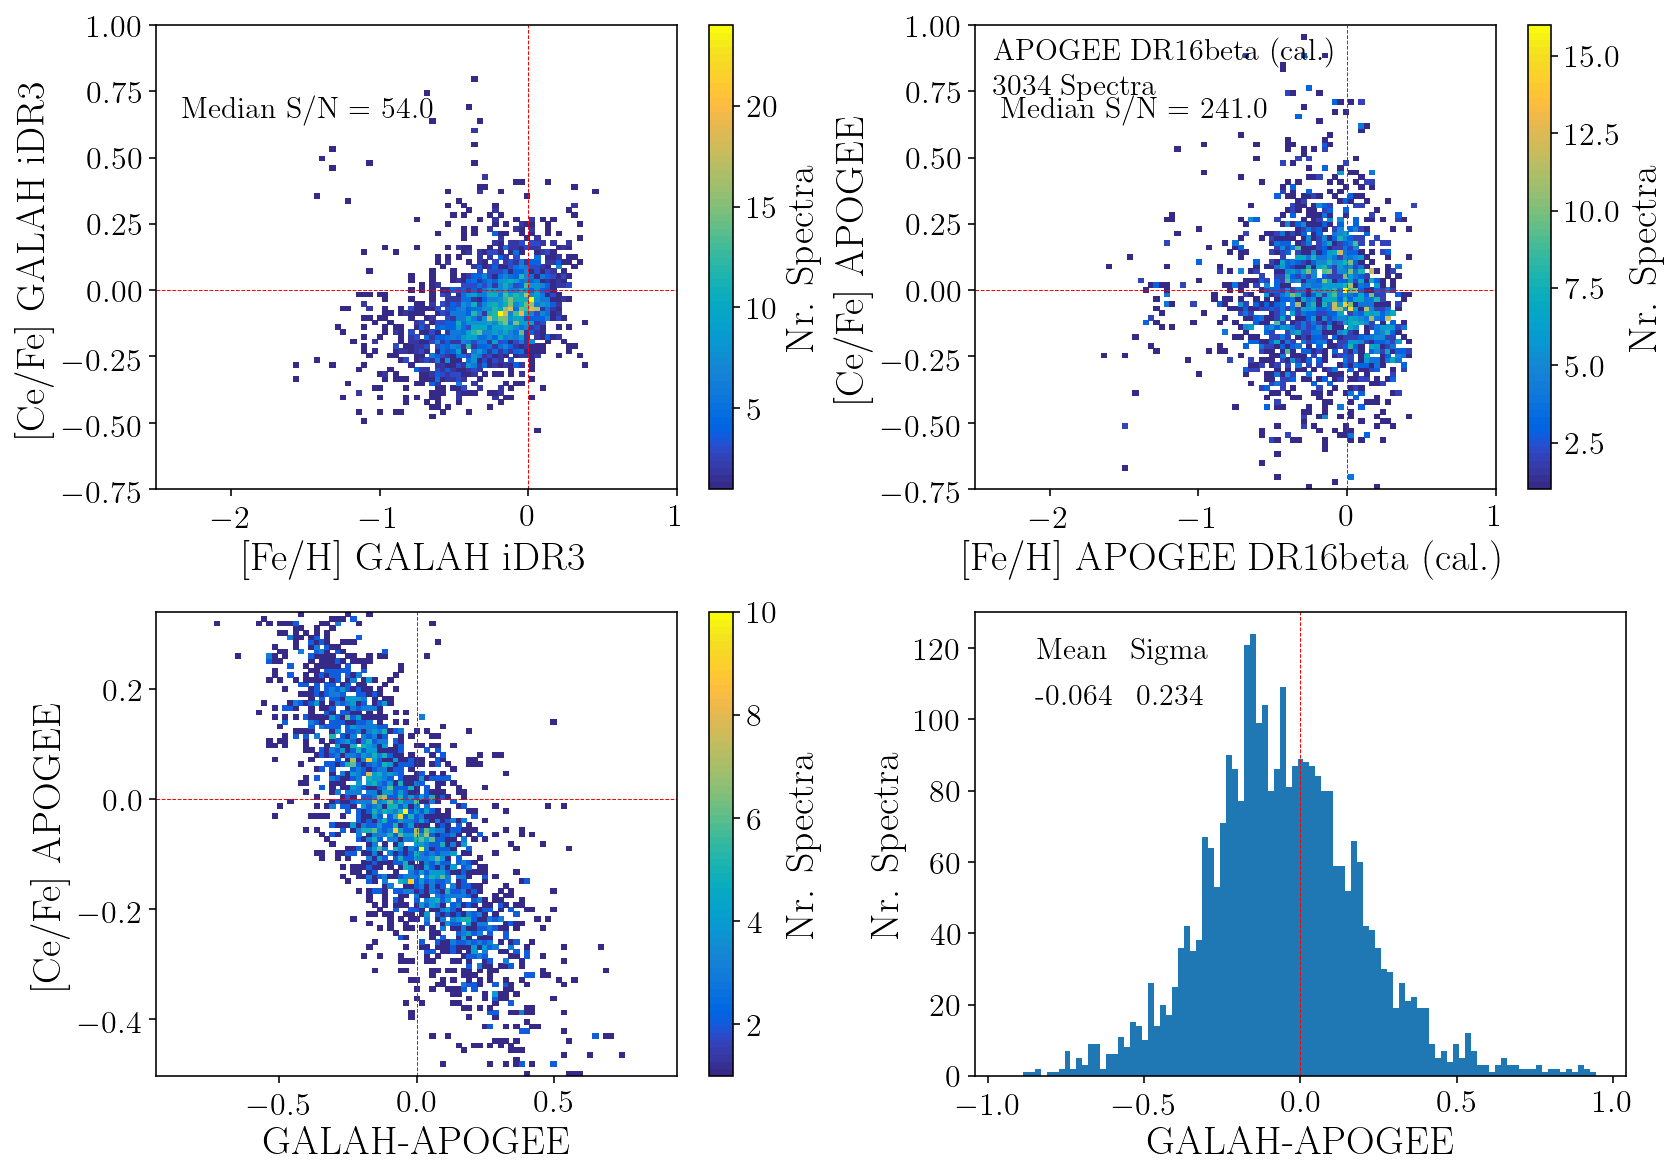

In [8]:
with PdfPages('GALAH_DR3_APOGEE_DR16.pdf') as pdf: 

    use = (
    (galah_apogee['SNR'] > 30) &
    (galah_apogee['snr_c2_iraf'] > 30) &
    (galah_apogee['flag_sp'] == 0) & 
    np.isfinite(galah_apogee['fe_h']) & 
    (galah_apogee['FE_H_FLAG'] == 0) & 
    (galah_apogee['ASPCAPFLAG'] == 0) & 
    (galah_apogee['TEFF'] > 3000) & 
    (galah_apogee['TEFF'] < 8000) & 
    (galah_apogee['LOGG'] < 5) & 
    (galah_apogee['LOGG'] > -5)
    )
    
    plt.figure(figsize=(11.69,8.27))
    gs = gridspec.GridSpec(3, 6)
    ax0 = plt.subplot(gs[0,:])
    ax1 = plt.subplot(gs[1:,:3 ])
    ax2 = plt.subplot(gs[1:,3: ])

    kwargs_text = dict(transform=ax0.transAxes, ha='center')
    ax0.text(0.5,0.8,'Stellar Spectroscopic Survey Comparison',fontsize = 25, **kwargs_text)
    ax0.text(0.5,0.65,'GALAH DR3 vs. APOGEE DR16',fontsize = 20, **kwargs_text)
    ax0.text(0.5,0.5,'based on '+str(len(galah_apogee))+' overlapping spectra (all X-matches)',fontsize = 20, **kwargs_text)
    ax0.text(0.5,0.3,'with GALAH quality flags:',fontsize = 15, **kwargs_text)
    ax0.text(0.5,0.2,r'S/N (CCD2) $>$ 30, flag\_sp = 0, flag\_X\_fe = 0',fontsize = 15, **kwargs_text)
    ax0.text(0.5,0.1,'with APOGEE quality flags:',fontsize = 15, **kwargs_text)
    ax0.text(0.5,0.0,r'S/N $>$ 30, ASPCAPFLAG = 0, X\_FE\_FLAG = 0',fontsize = 15, **kwargs_text)
    ax0.text(0.5,-0.15,r'Giants here: TEFF $<$ 5500 and LOGG $<$ 3.5, Dwarfs == not giants',fontsize = 15, **kwargs_text)
    ax0.axis('off')
    plot_kiel_comparison(galah_apogee[use], ax1=ax2, ax2=ax1, label= 'APOGEE DR16 (cal.)');
    plt.tight_layout()
    pdf.savefig(dpi=300)
    plt.savefig('GALAH_DR3_APOGEE_DR16_kiel.png',dpi=300)

    f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(11.69,8.27))

    plot_delta(
        galah_apogee[use], 
        galah_param='teff', 
        comparison_param='TEFF', 
        ax=ax1,
        xlabel = r'$T_\text{eff}$ GALAH',
        ylabel = r'$T_\text{eff}$ A - G',
        we_them = 'galah_other',
        cmin=3, bins = (np.linspace(3500,7250,100), np.linspace(-400,400,100)))

    plot_delta(
        galah_apogee[use], 
        galah_param='logg', 
        comparison_param='LOGG', 
        ax=ax2,
        xlabel = r'$\log g$ GALAH',
        ylabel = r'$\log g$ A - G',
        we_them = 'galah_other',
        cmin=3, bins = (np.linspace(0,5,100), np.linspace(-0.75,0.75,100)))

    plot_delta(
        galah_apogee[use], 
        galah_param='fe_h', 
        comparison_param='FE_H',
        ax=ax3,
        xlabel = r'[Fe/H] GALAH',
        ylabel = r'[Fe/H] A - G',
        we_them = 'galah_other',
        cmin=3, bins = (np.linspace(-2.5,0.65,100), np.linspace(-0.5,0.5,100)))

    plt.tight_layout()
    pdf.savefig(dpi=300)
    plt.savefig('GALAH_DR3_APOGEE_DR16_deltaparam.png',dpi=300)
    # plt.close()

    for each_element in ['alpha','C','O','Na','Mg','Al','Si','K','Ca','Ti','Ti2','V','Cr','Mn','Co','Ni','Cu','Ce']: 
        plot_abundances_APOGEE(each_element, use_sp=use)
        pdf.savefig(dpi=300)
        if each_element == 'alpha':
            plt.savefig('GALAH_DR3_APOGEE_DR16_alpha.png',dpi=300)